In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('C:/Users/chatu/OneDrive/Documents/Projects/Python Projects/worldometer_coronavirus_summary_data.csv')

In [6]:
df = df.fillna('NA')
df.head(50)

country          continent  total_confirmed total_deaths  \
0                Afghanistan               Asia           179267       7690.0   
1                    Albania             Europe           275574       3497.0   
2                    Algeria             Africa           265816       6875.0   
3                    Andorra             Europe            42156        153.0   
4                     Angola             Africa            99194       1900.0   
5                   Anguilla      North America             2984          9.0   
6        Antigua And Barbuda      North America             7721        137.0   
7                  Argentina      South America          9101319     128729.0   
8                    Armenia               Asia           422896       8623.0   
9                      Aruba      North America            35693        213.0   
10                 Australia  Australia/Oceania          6593795       7794.0   
11                   Austria             Europe          4212492      18303.0   
12                Azerbaijan               Asia           792638       9709.0   
13                   Bahamas      North America            33871        801.0   
14                   Bahrain               Asia           576997       1479.0   
15                Bangladesh               Asia          1953012      29127.0   
16                  Barbados      North America            76261        433.0   
17                   Belarus             Europe           982867       6978.0   
18                   Belgium             Europe          4116397      31613.0   
19                    Belize      North America            57896        676.0   
20                     Benin             Africa            26952        163.0   
21                   Bermuda      North America            14135        135.0   
22                    Bhutan               Asia            59570         21.0   
23                   Bolivia      South America           906146      21943.0   
24    Bosnia And Herzegovina             Europe           377511      15778.0   
25                  Botswana             Africa           306324       2690.0   
26                    Brazil      South America         30682094     664920.0   
27    British Virgin Islands      North America             6573         62.0   
28         Brunei Darussalam               Asia           144659        220.0   
29                  Bulgaria             Europe          1161504      37045.0   
30              Burkina Faso             Africa            20853        382.0   
31                   Burundi             Africa            41235         38.0   
32                Cabo Verde             Africa            56105        401.0   
33                  Cambodia               Asia           136262       3056.0   
34                  Cameroon             Africa           119780       1927.0   
35                    Canada      North America          3821346      40228.0   
36     Caribbean Netherlands      North America             9915         35.0   
37            Cayman Islands      North America            23578         28.0   
38  Central African Republic             Africa            14649        113.0   
39                      Chad             Africa             7414        193.0   
40           Channel Islands             Europe            75275        173.0   
41                     Chile      South America          3605522      57722.0   
42       China Hong Kong Sar               Asia          1208506       9361.0   
43           China Macao Sar               Asia               82           NA   
44                     China               Asia           221804       5209.0   
45                  Colombia      South America          6095316     139821.0   
46                   Comoros             Africa             8100        160.0   
47                     Congo             Africa            24079        385.0   
48              Cook Islands  Australia/Oceania     

In [8]:
df.drop(['active_cases','serious_or_critical'],axis = 1, inplace=True)
df.rename(columns = {'country':'Country','continent':'Continent','total_confirmed':'Total Confirmed Cases','total_deaths':'Total Confirmed Deaths','total_recovered':'Total Recovered Patients','total_deaths_per_1m_population':'Total Deaths per 1m Population','total_cases_per_1m_population':'Total Cases per 1m Population','total_tests_per_1m_population':'Total Tests per 1m Population','total_tests':'Total Number of Tests','population':'Population'},inplace=True)

In [10]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [12]:
df3 = df2.groupby(['Country','Continent'])[['Total Confirmed Cases','Total Confirmed Deaths','Total Recovered Patients']].sum().reset_index()

In [14]:
df3.head(20)

Country          Continent Total Confirmed Cases  \
0           Afghanistan               Asia                179267   
1               Albania             Europe                275574   
2               Algeria             Africa                265816   
3               Andorra             Europe                 42156   
4                Angola             Africa                 99194   
5              Anguilla      North America                  2984   
6   Antigua And Barbuda      North America                  7721   
7             Argentina      South America               9101319   
8               Armenia               Asia                422896   
9                 Aruba      North America                 35693   
10            Australia  Australia/Oceania               6593795   
11              Austria             Europe               4212492   
12           Azerbaijan               Asia                792638   
13              Bahamas      North America                 33871   
14              Bahrain               Asia                576997   
15           Bangladesh               Asia               1953012   
16             Barbados      North America                 76261   
17              Belarus             Europe                982867   
18              Belgium             Europe               4116397   
19               Belize      North America                 57896   

   Total Confirmed Deaths Total Recovered Patients  
0                  7690.0                 162202.0  
1                  3497.0                 271826.0  
2                  6875.0                 178371.0  
3                   153.0                  41021.0  
4                  1900.0                  97149.0  
5                     9.0                   2916.0  
6                   137.0                   7511.0  
7                128729.0                8895999.0  
8                  8623.0                 412048.0  
9                   213.0                  35199.0  
10                 7794.0                6199822.0  
11                18303.0                4135885.0  
12                 9709.0                 782869.0  
13                  801.0                  32488.0  
14                 1479.0                 569758.0  
15                29127.0                1899419.0  
16                  433.0                  71497.0  
17                 6978.0                       NA  
18                31613.0                3941350.0  
19                  676.0                  56761.0

In [16]:
countries = df3['Country'].unique()
len(countries)

226

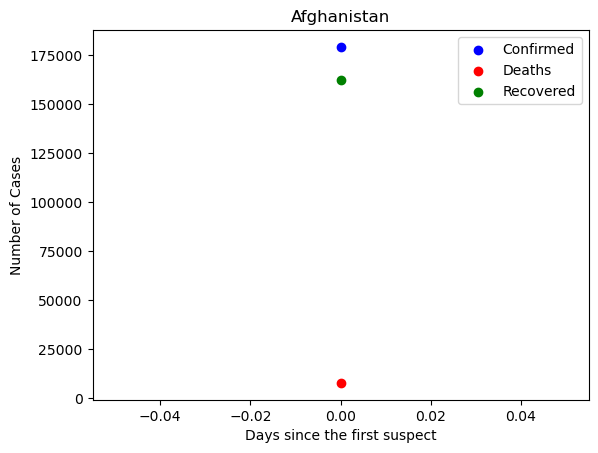

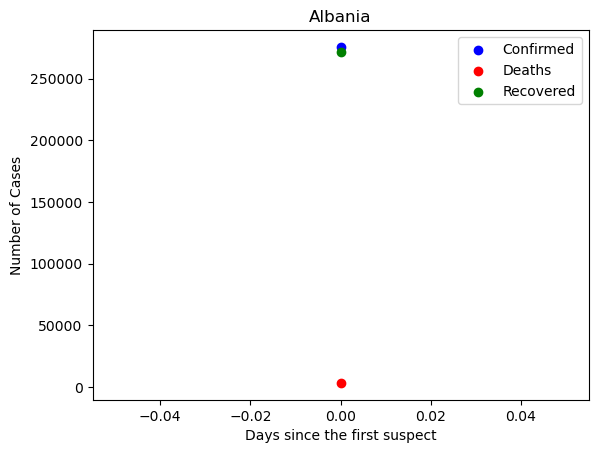

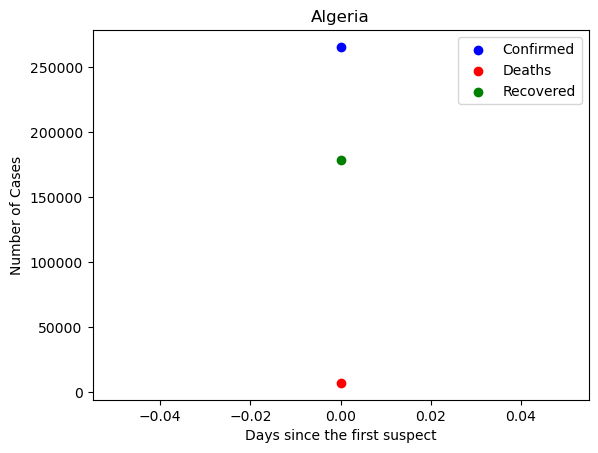

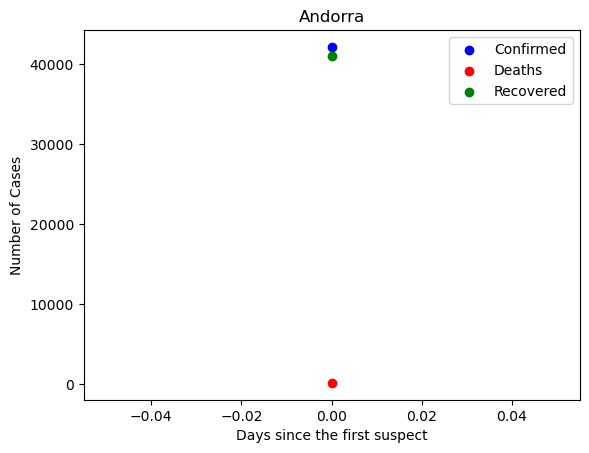

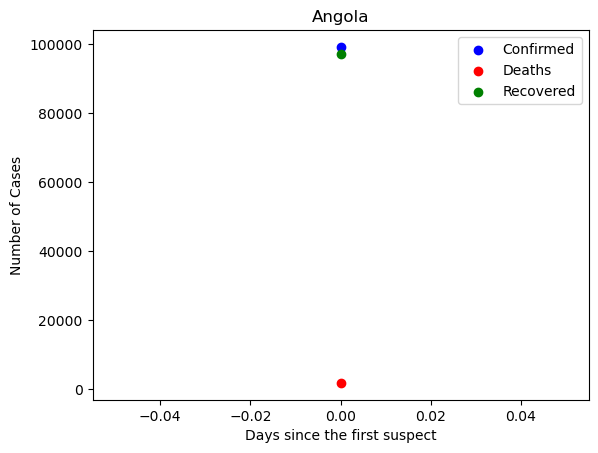

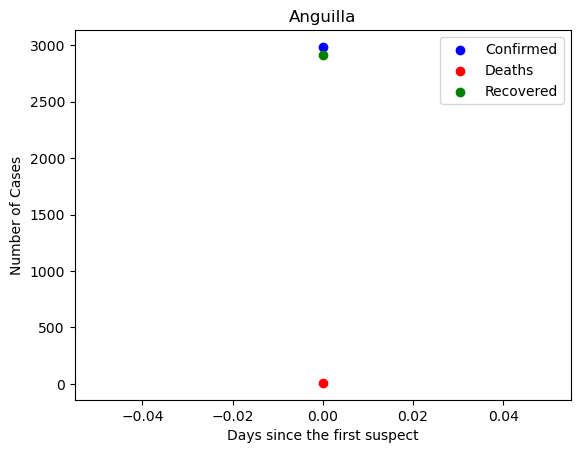

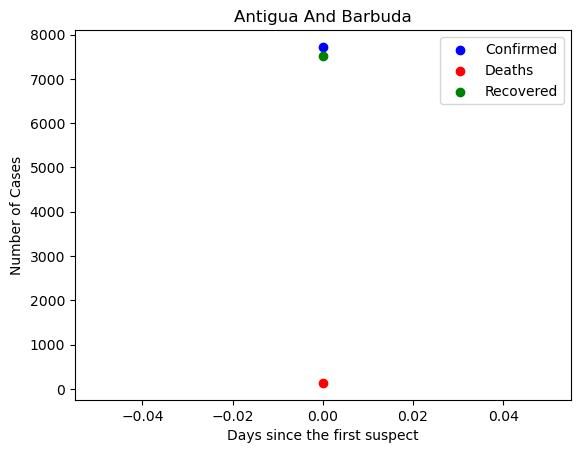

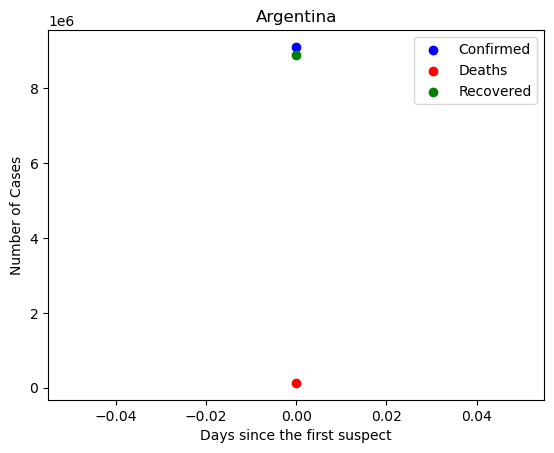

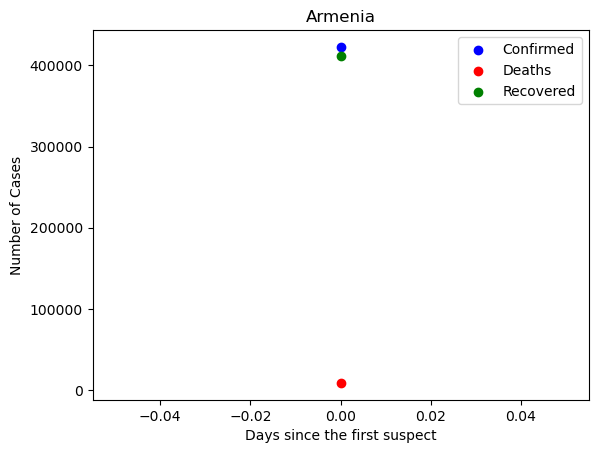

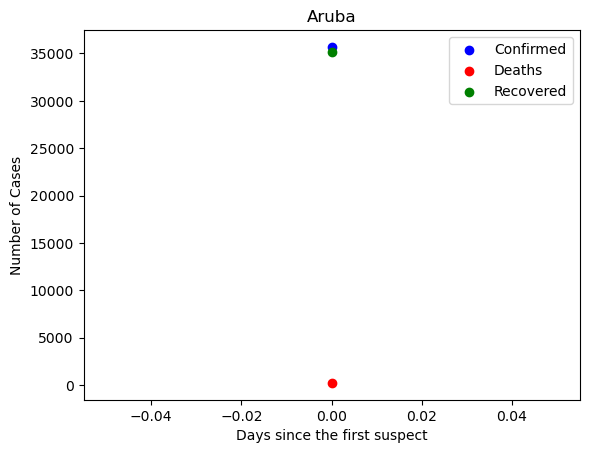

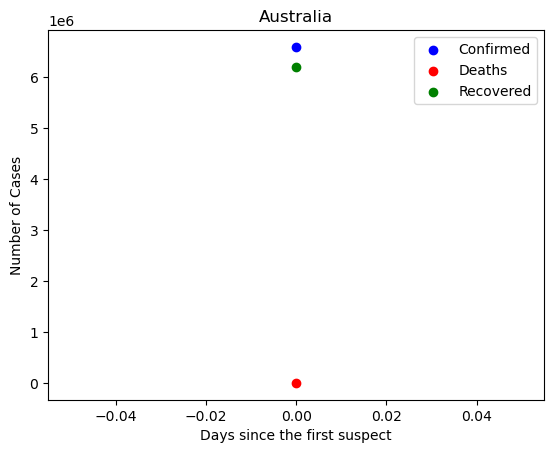

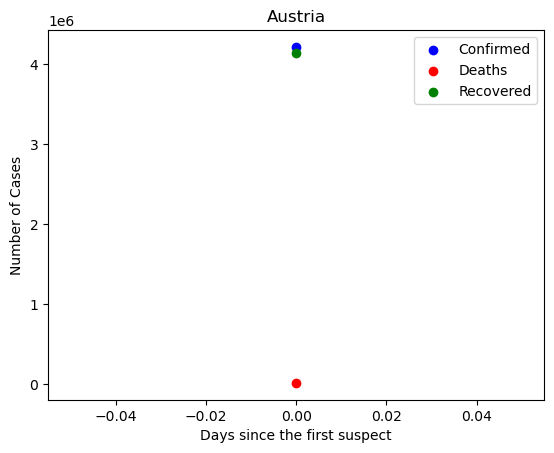

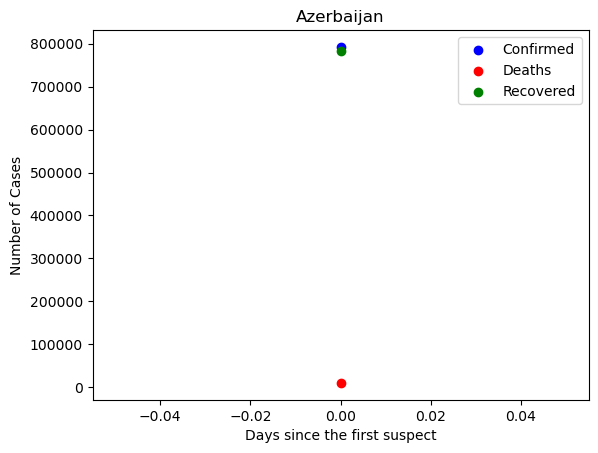

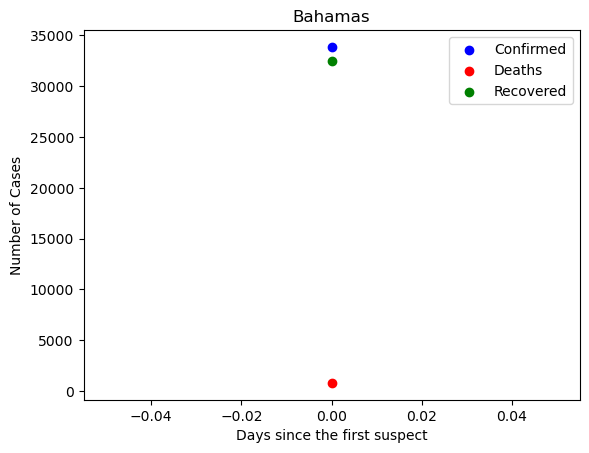

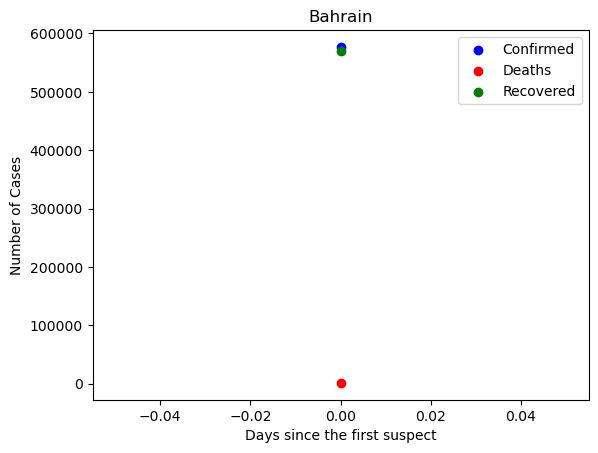

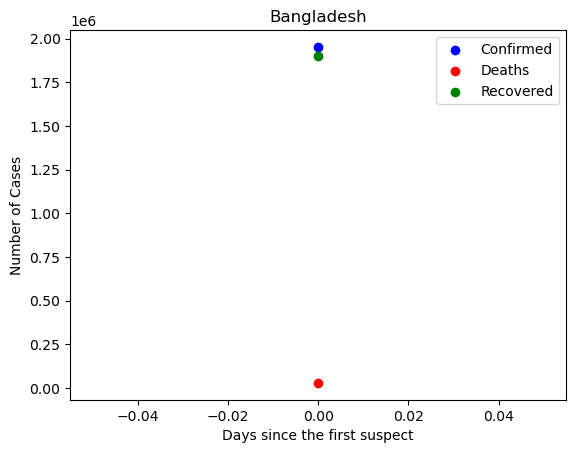

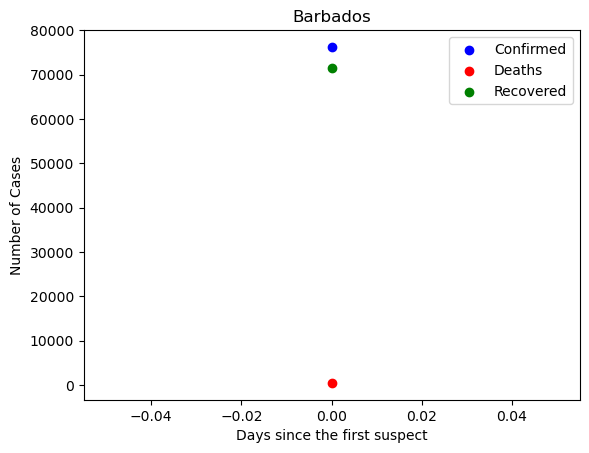

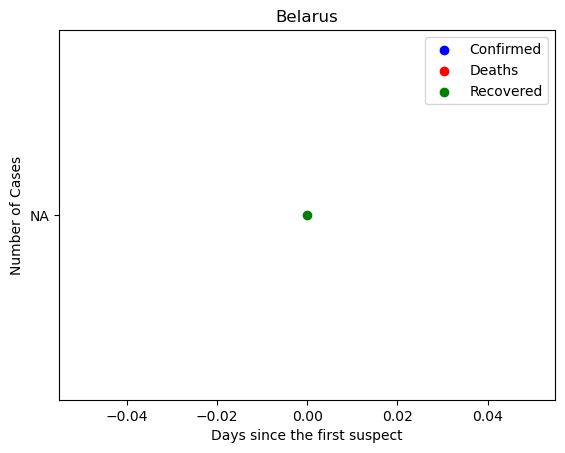

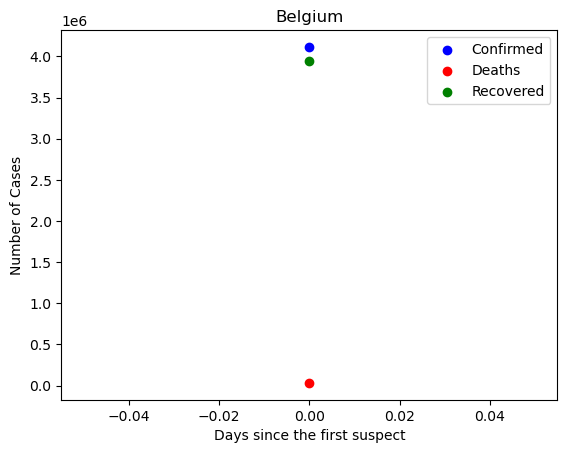

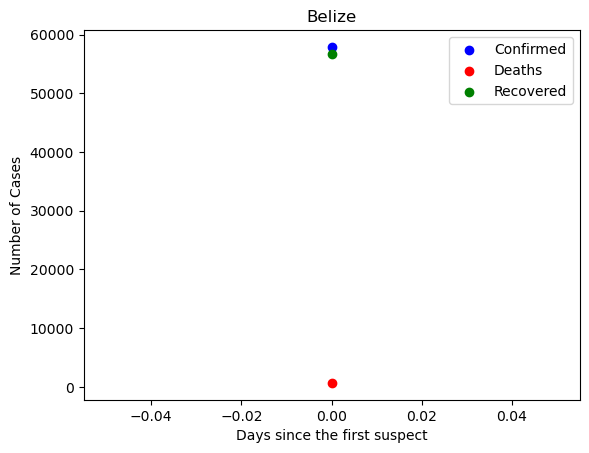

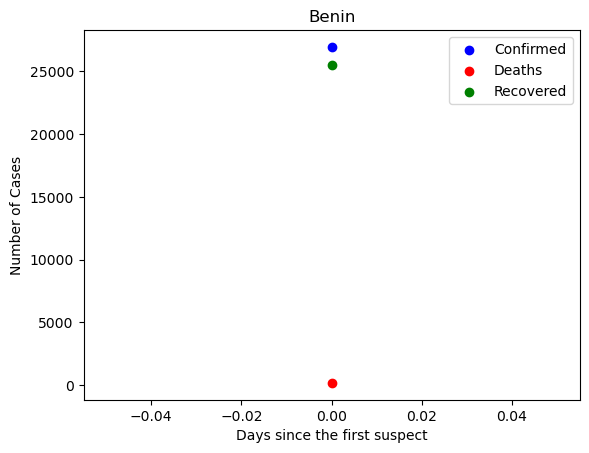

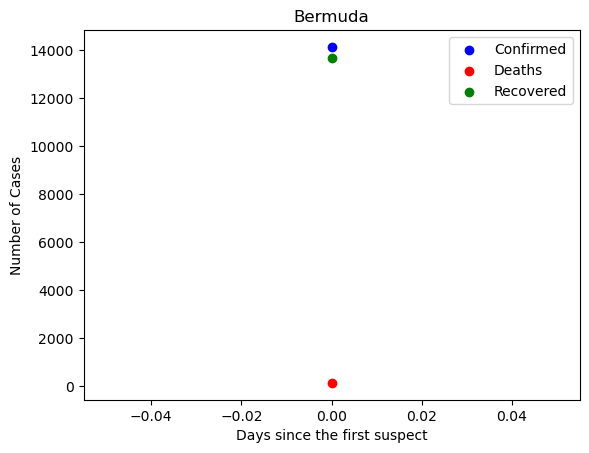

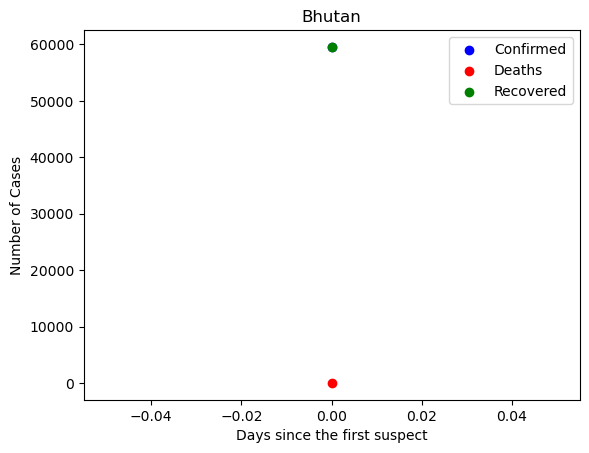

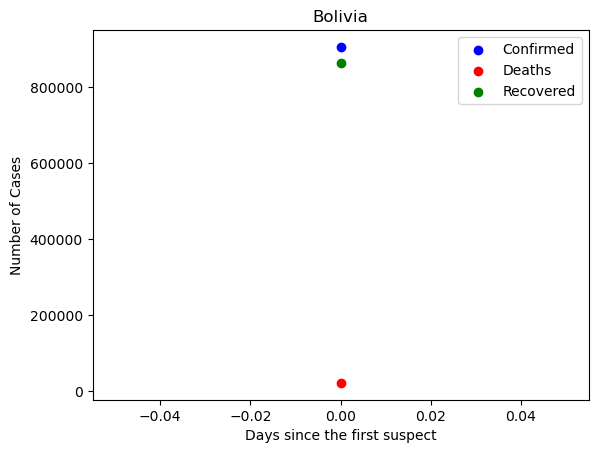

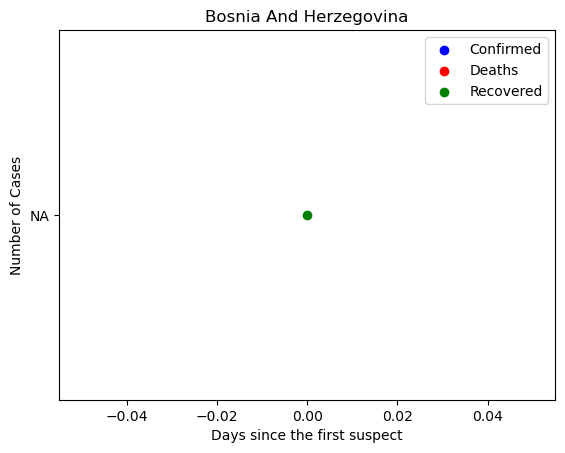

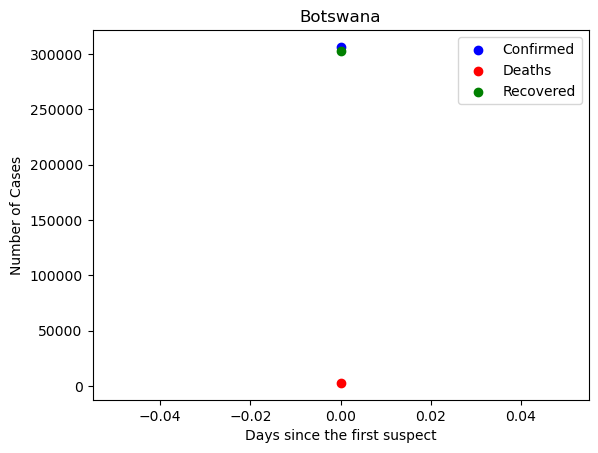

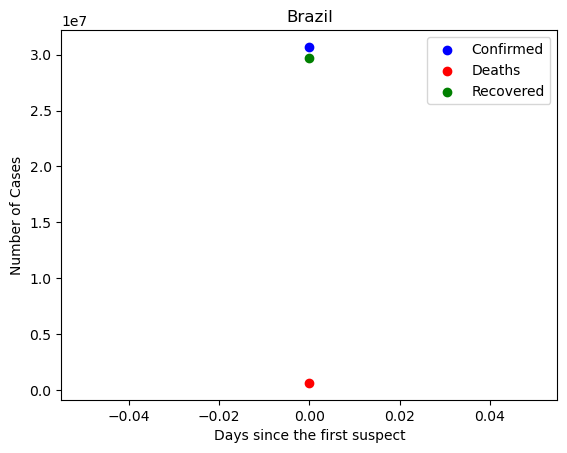

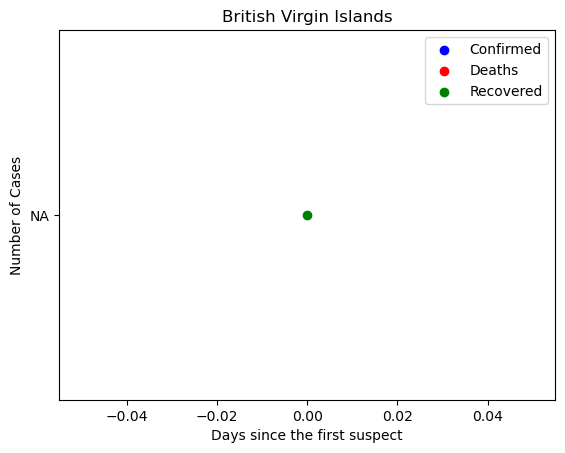

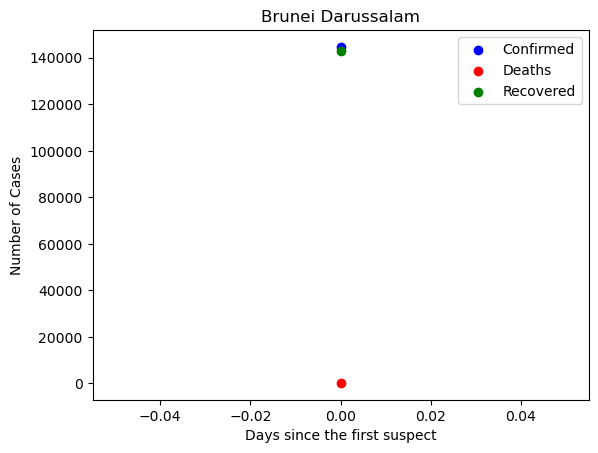

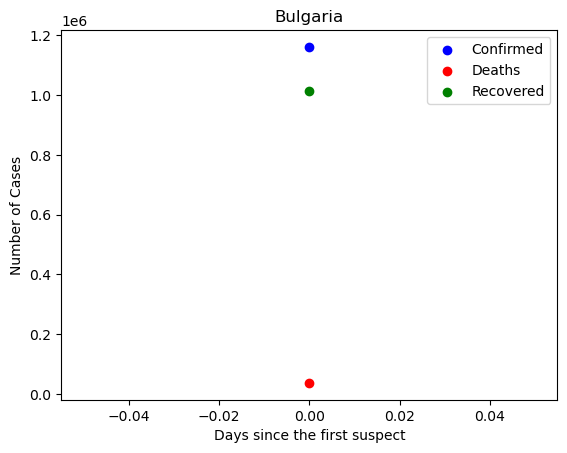

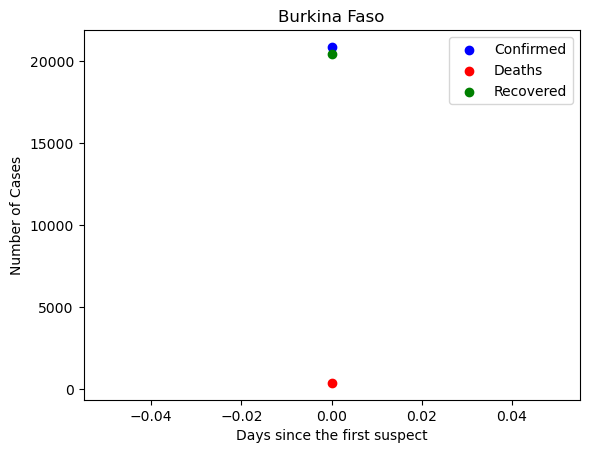

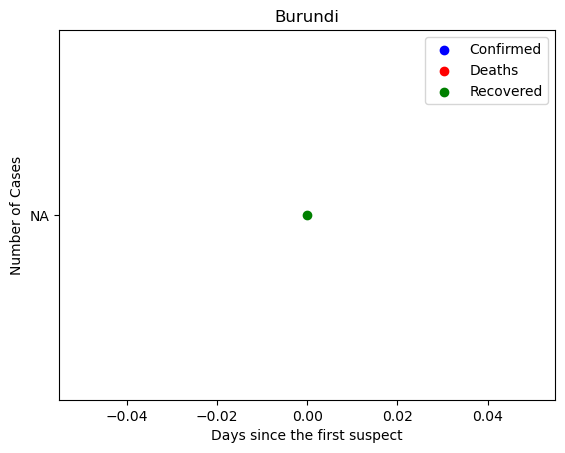

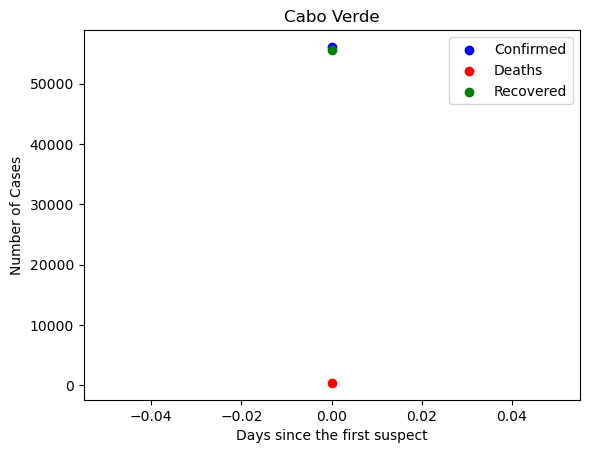

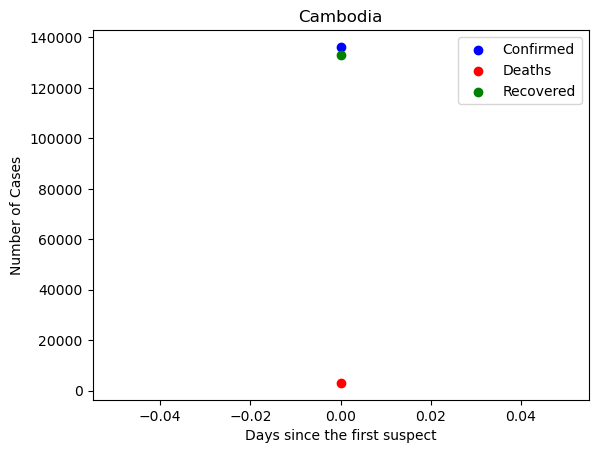

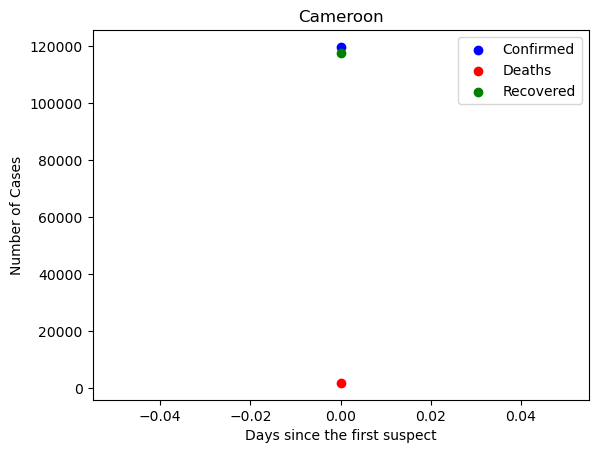

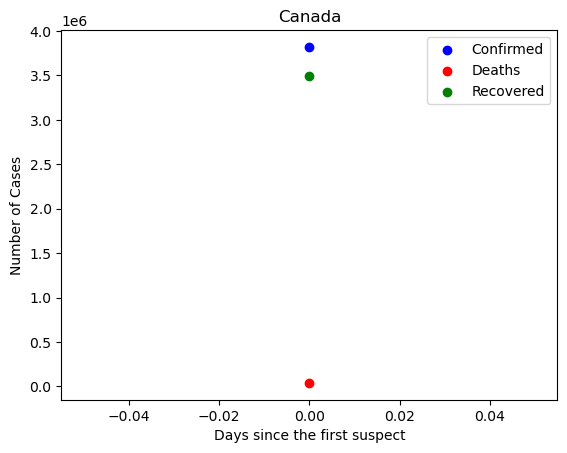

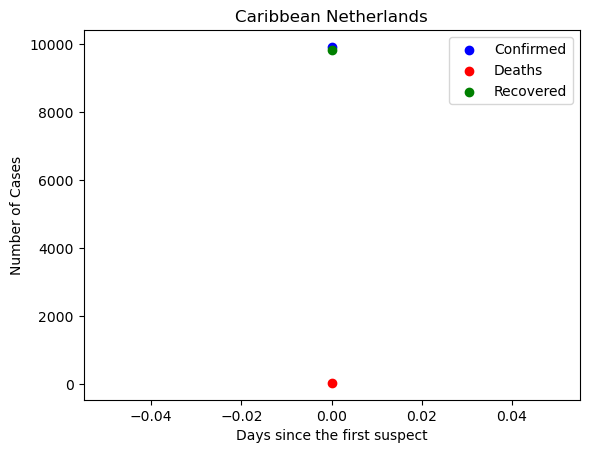

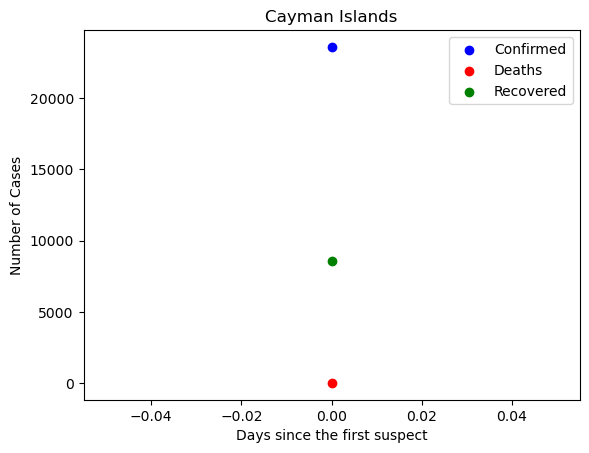

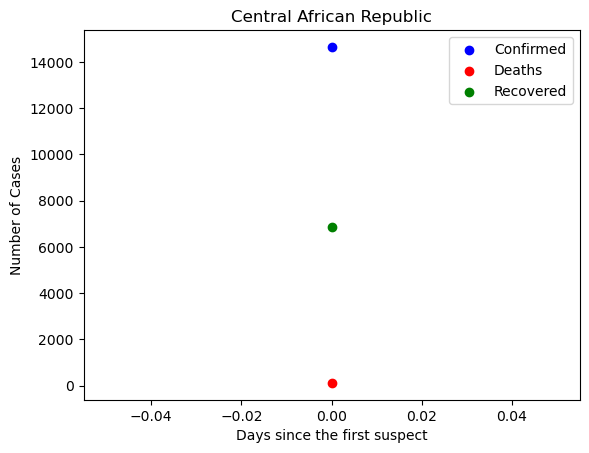

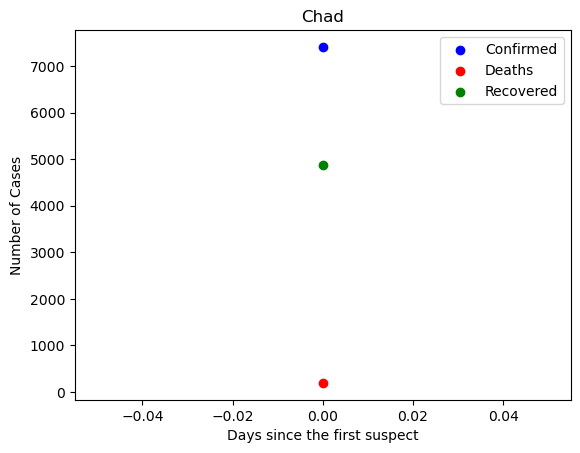

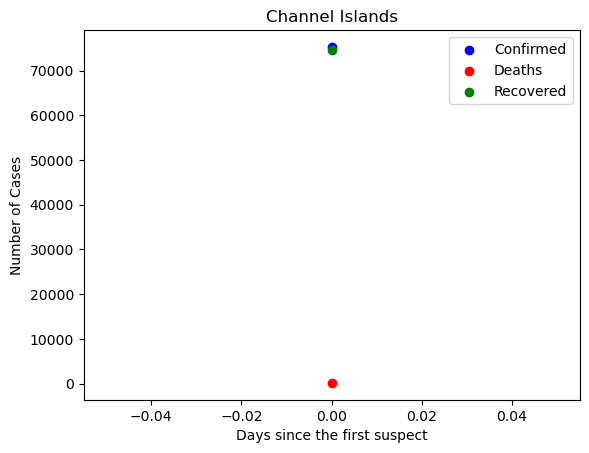

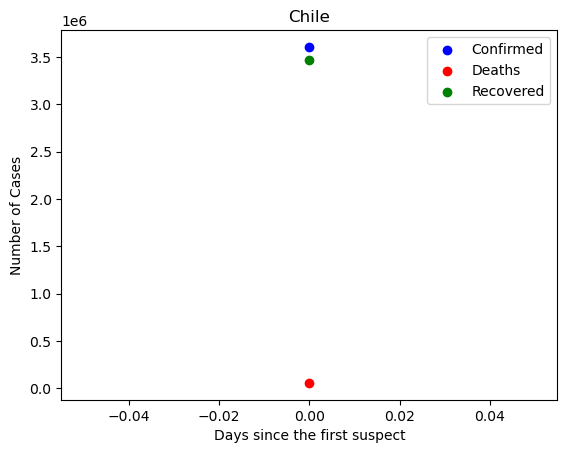

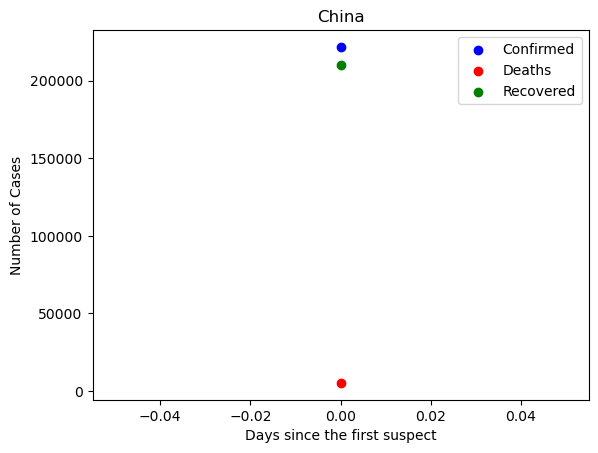

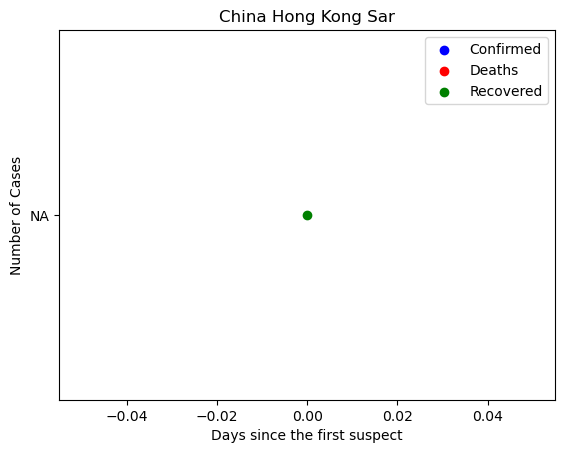

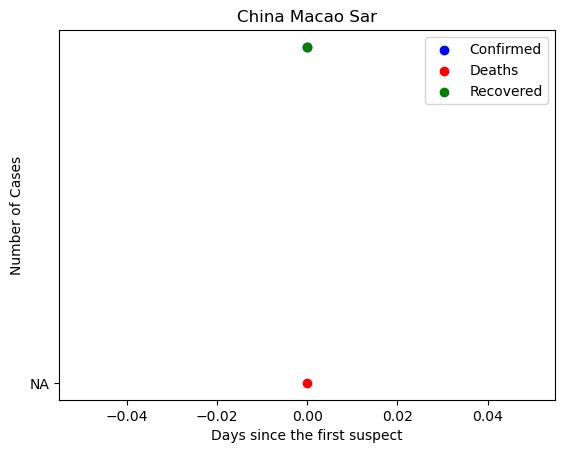

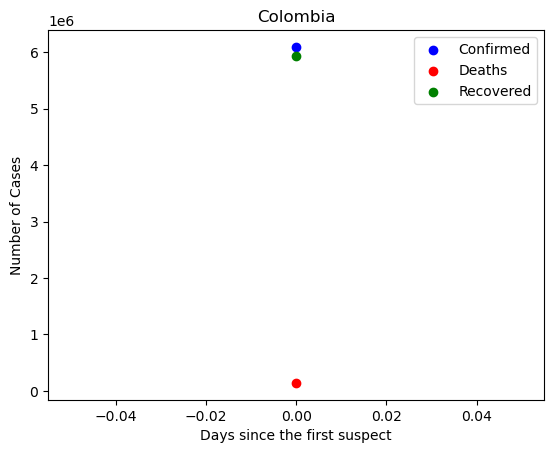

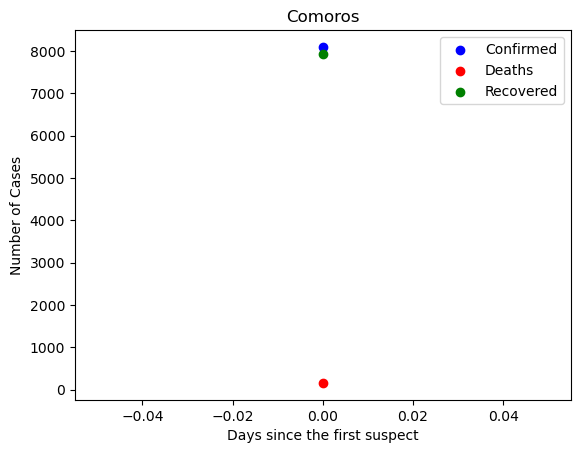

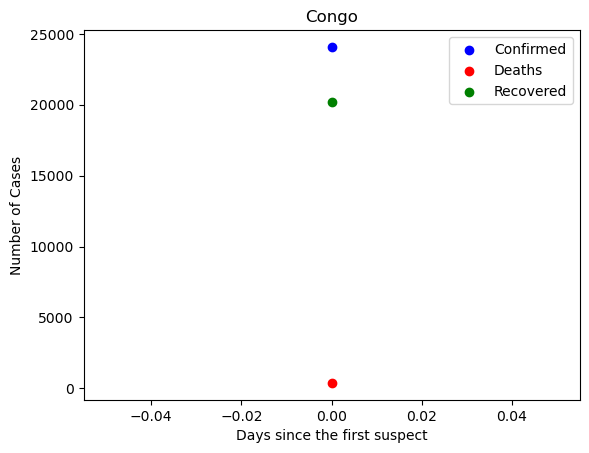

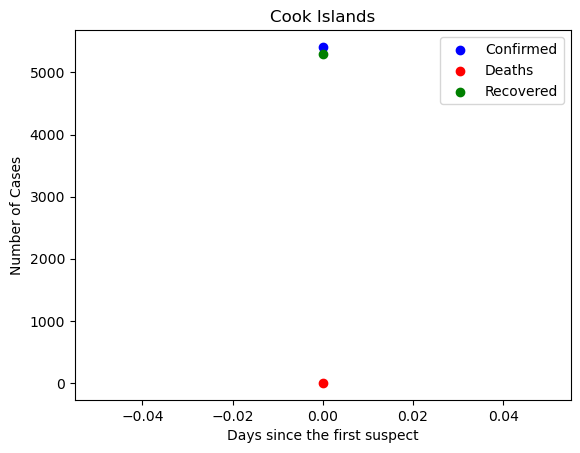

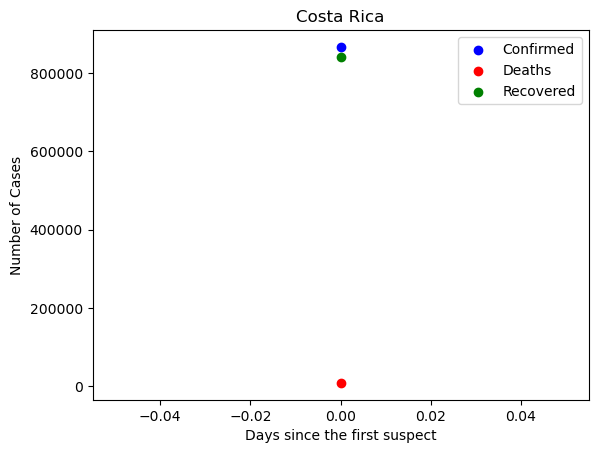

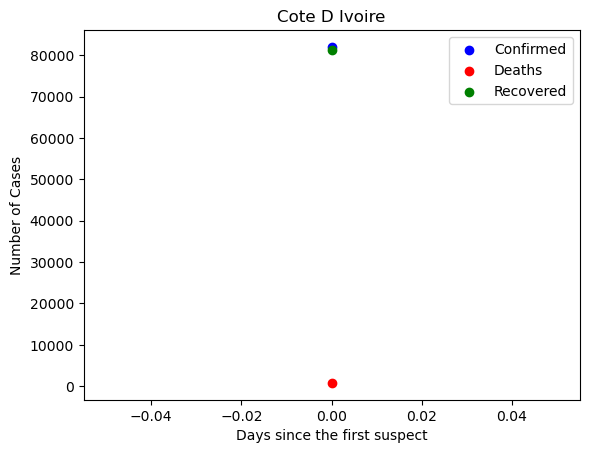

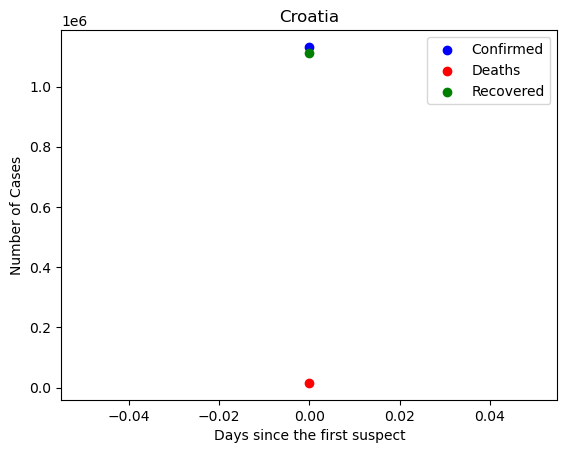

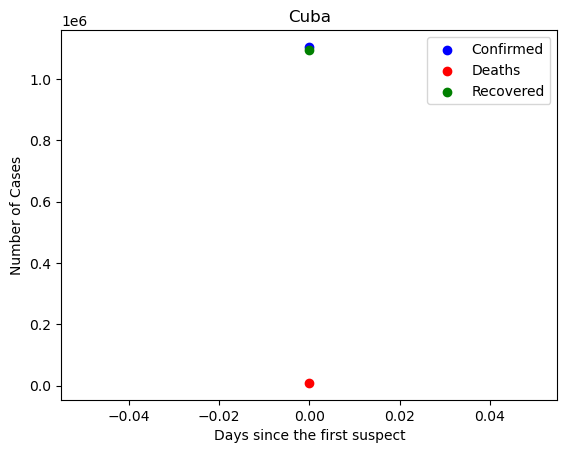

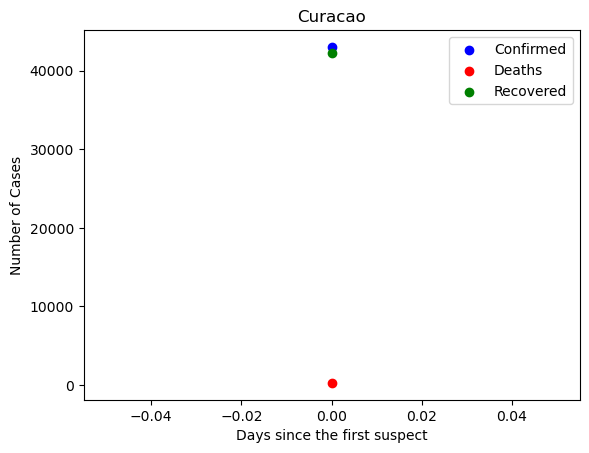

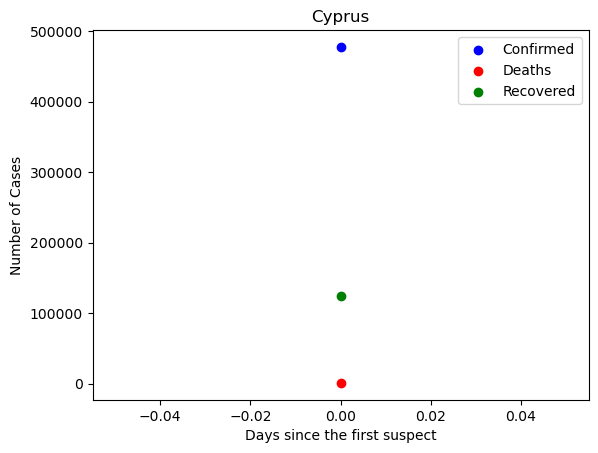

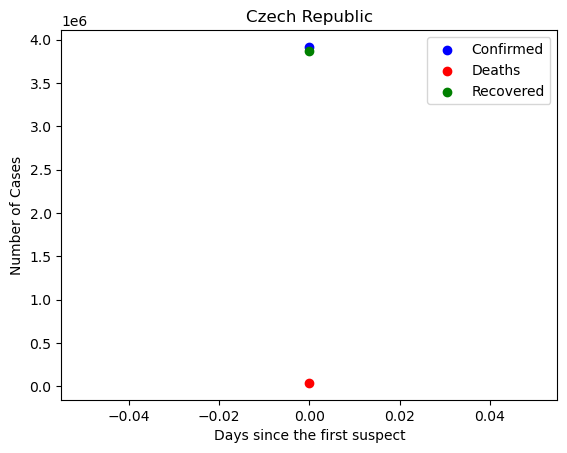

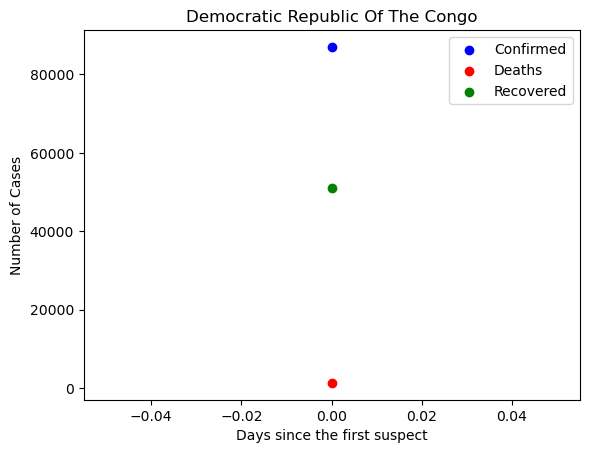

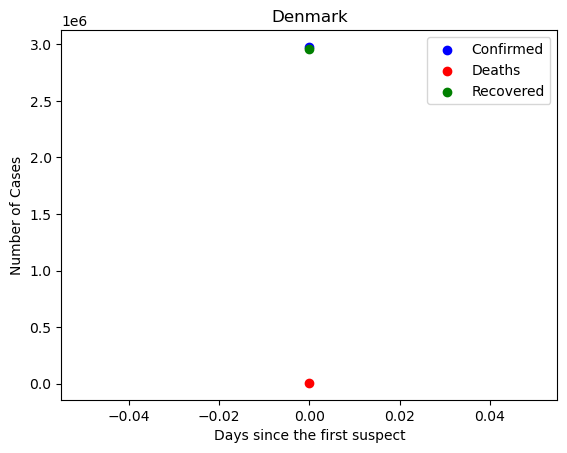

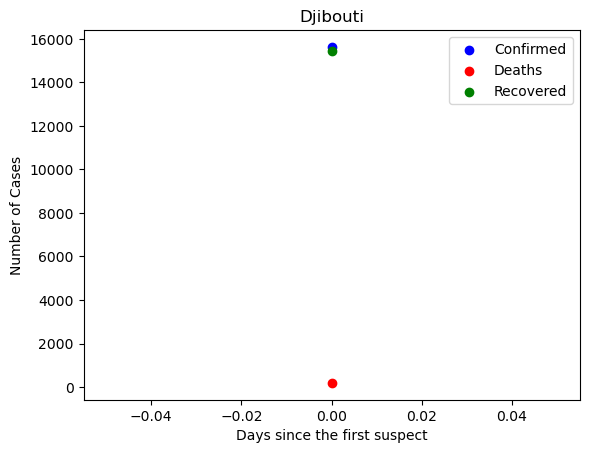

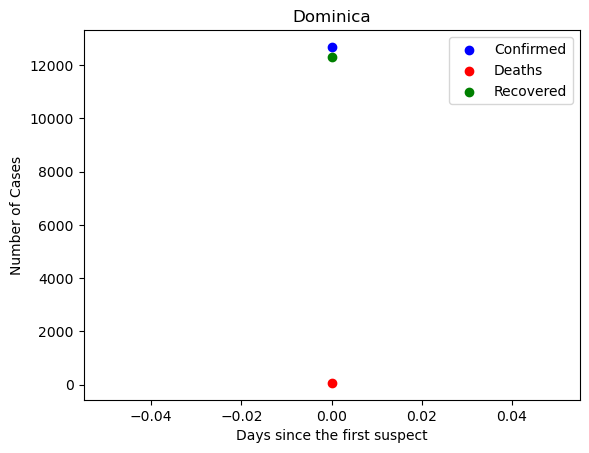

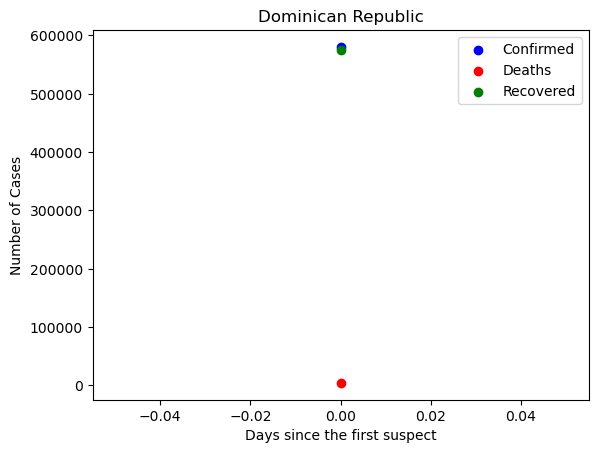

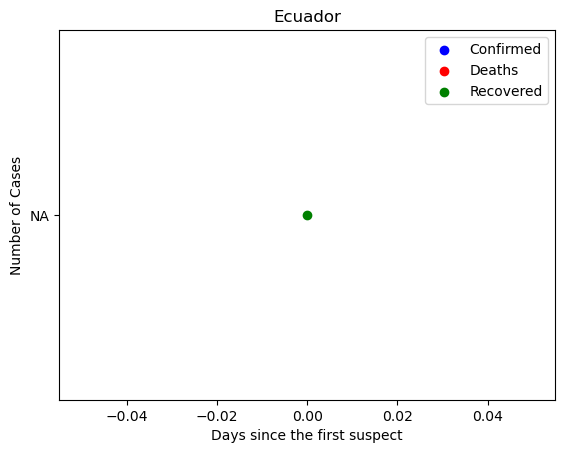

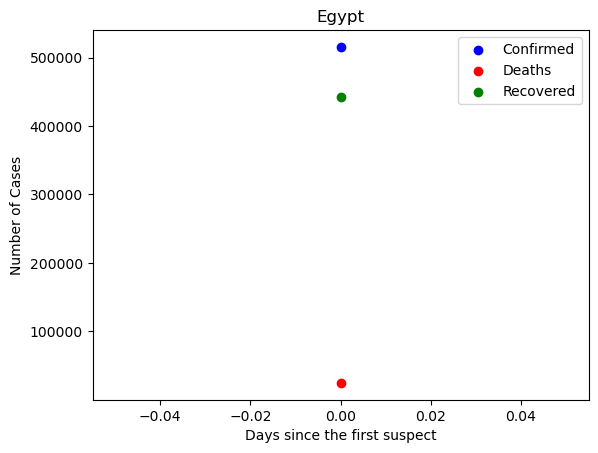

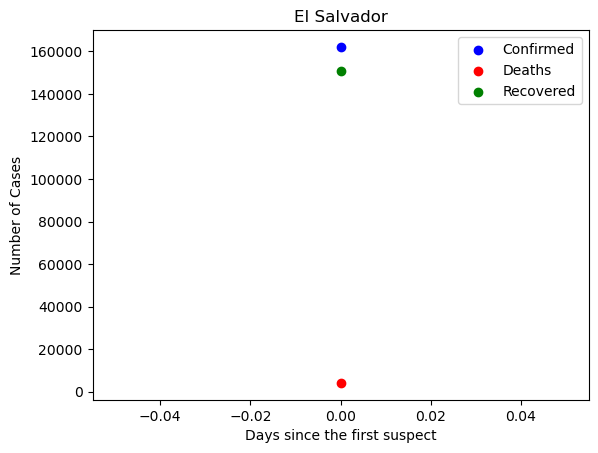

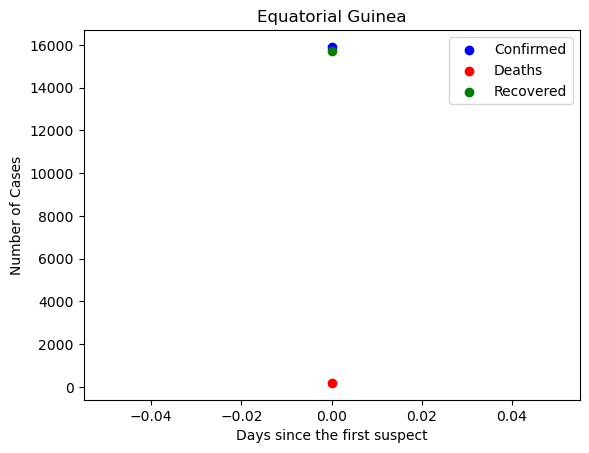

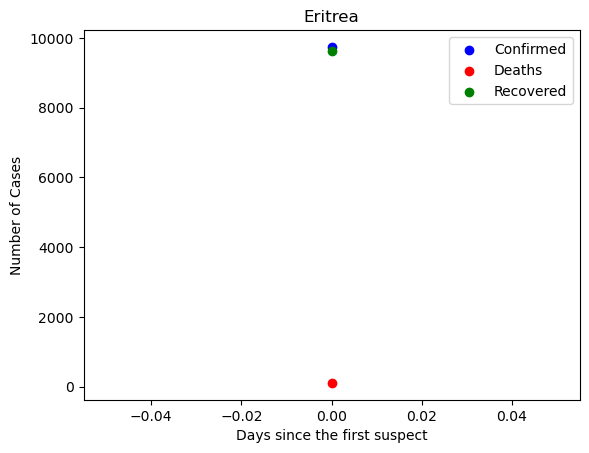

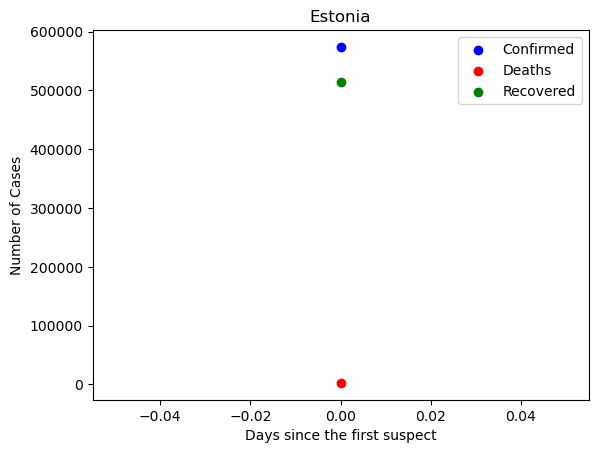

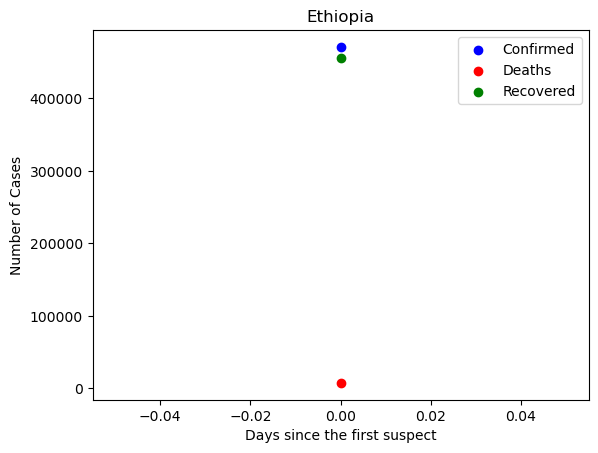

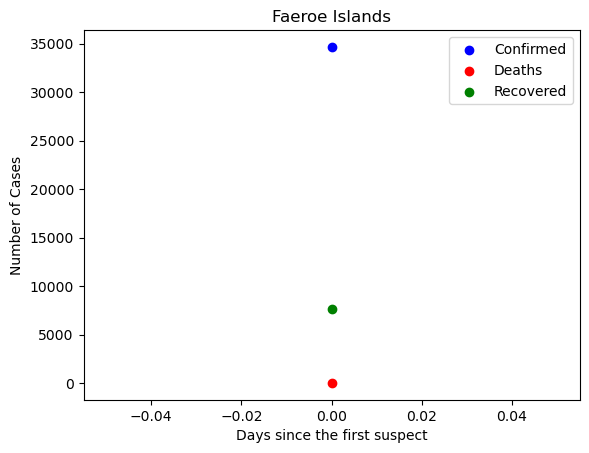

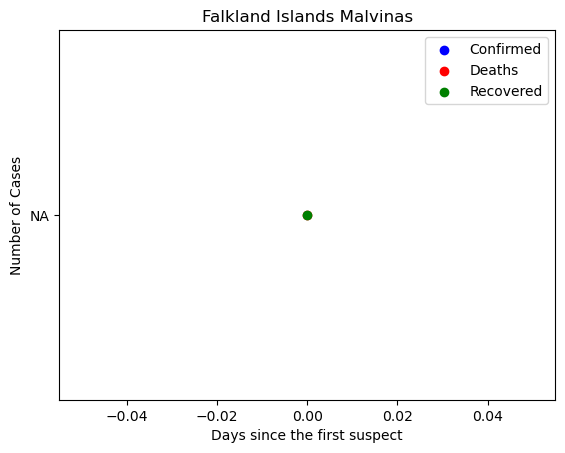

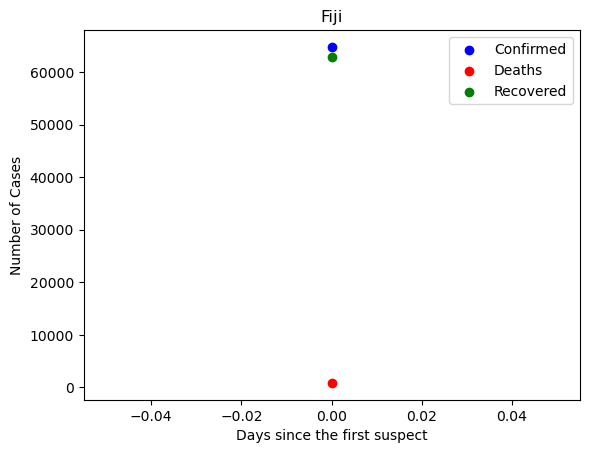

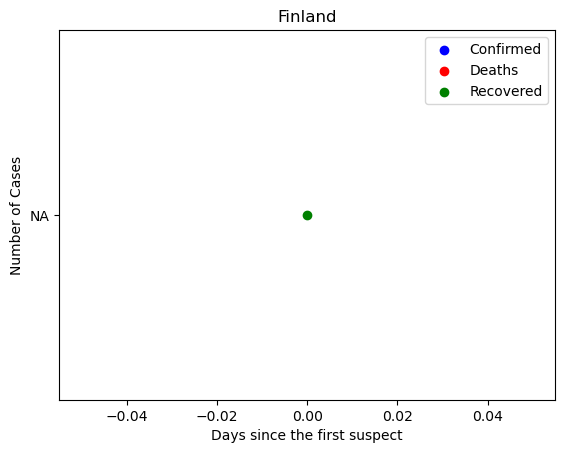

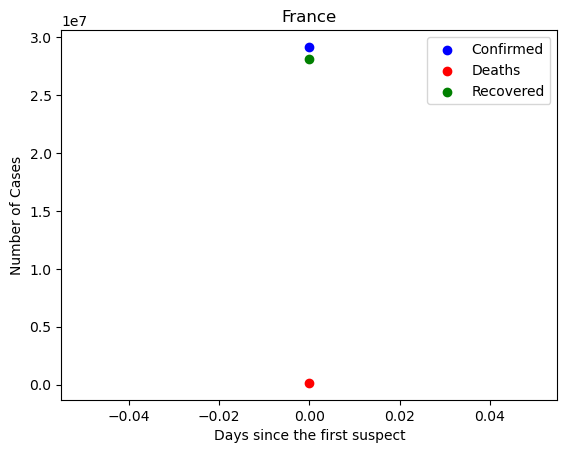

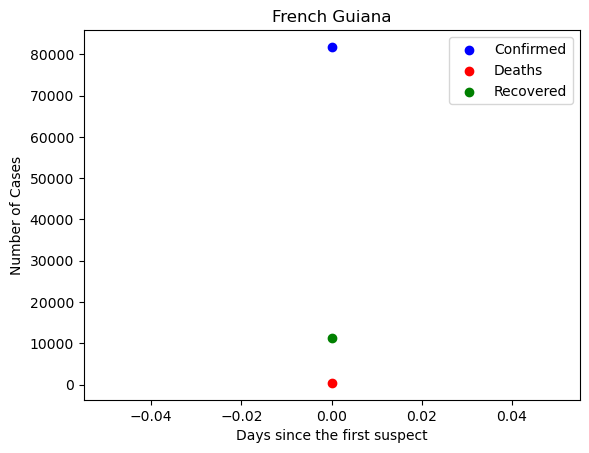

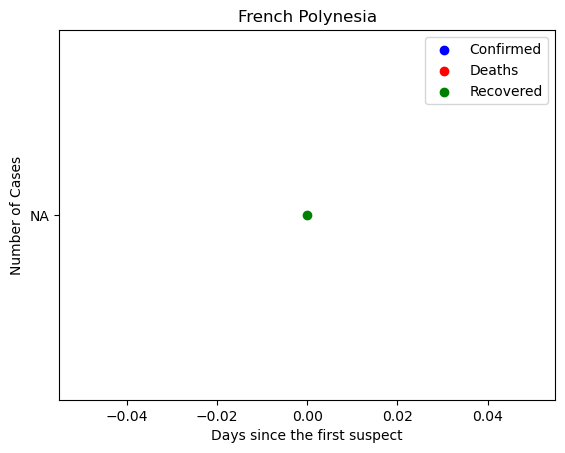

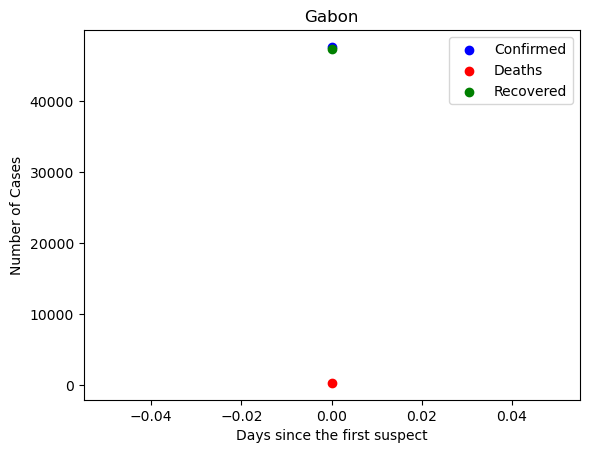

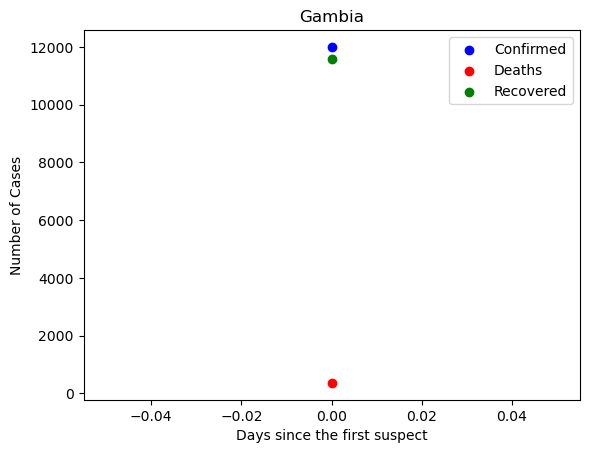

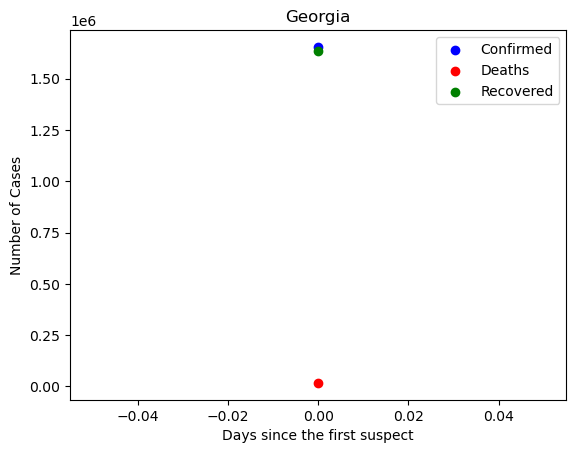

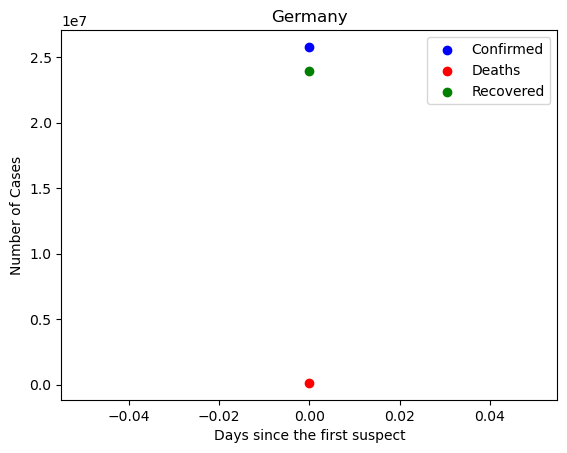

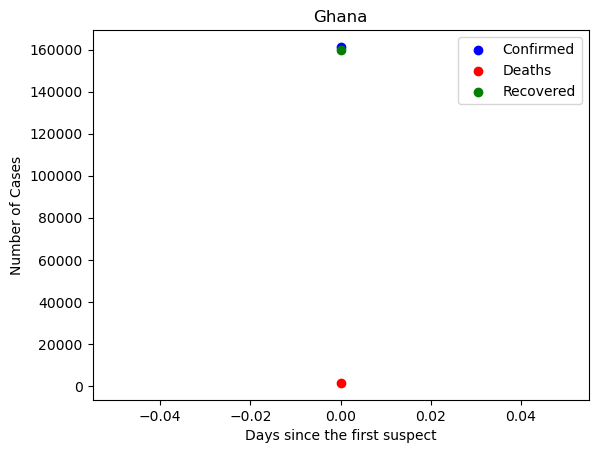

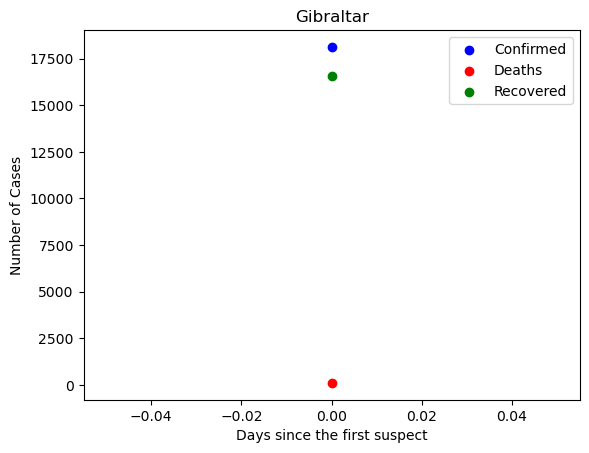

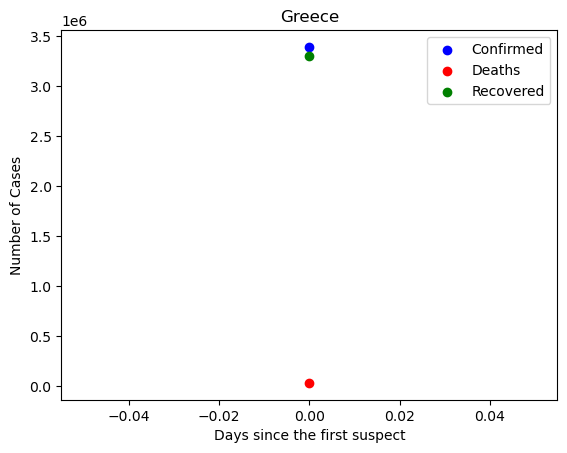

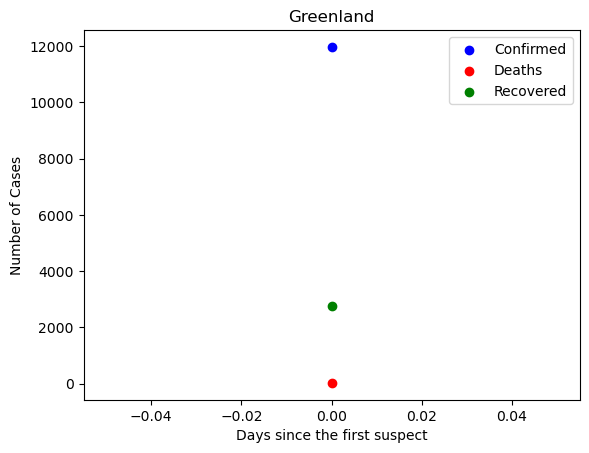

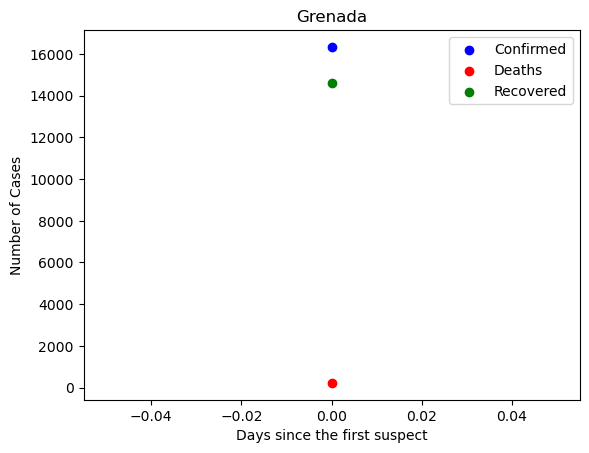

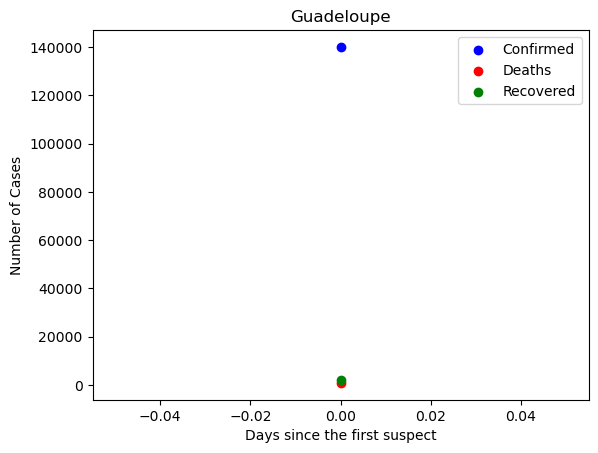

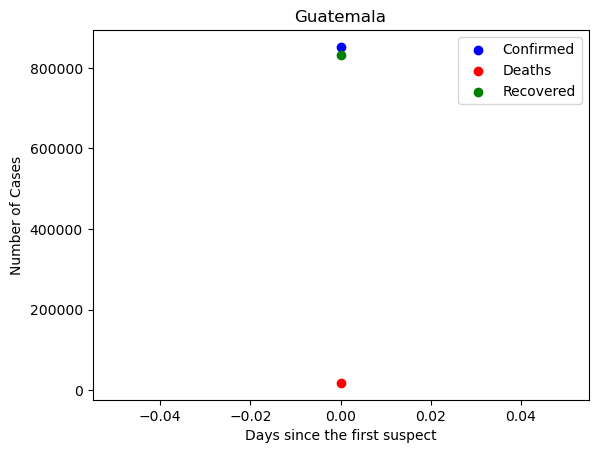

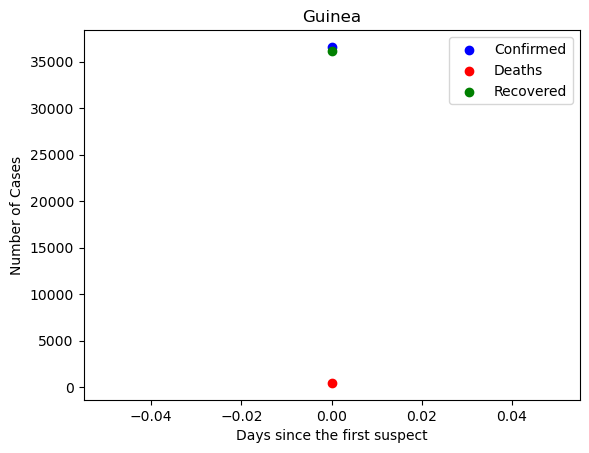

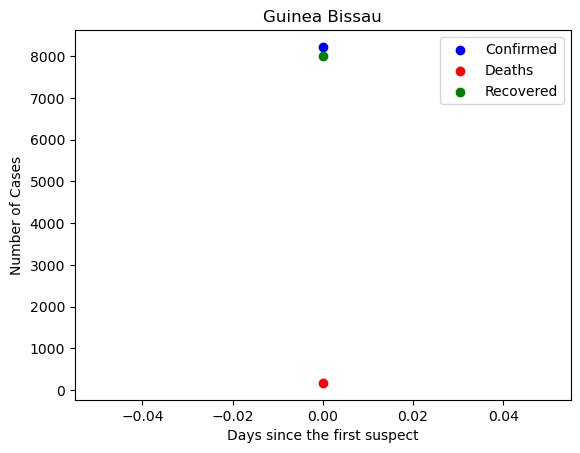

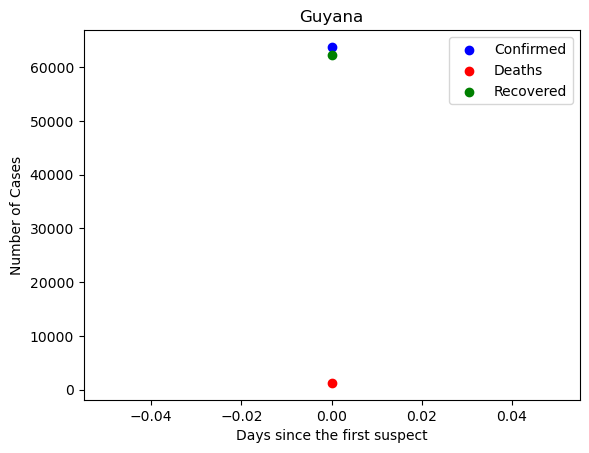

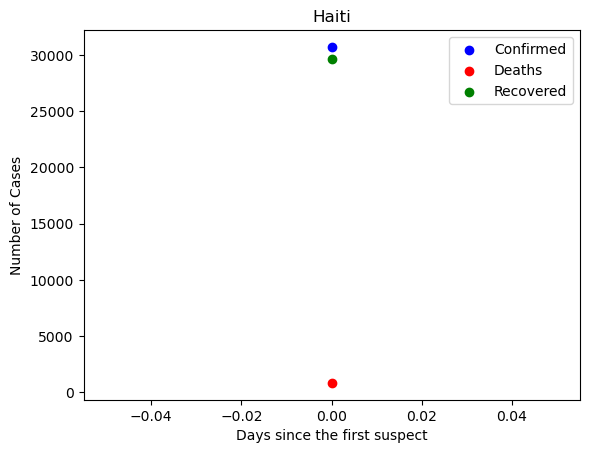

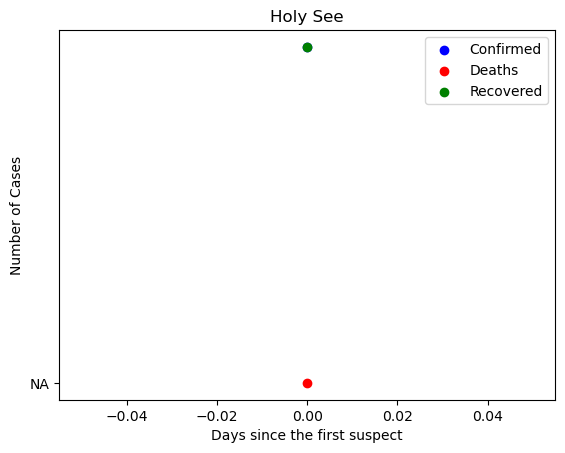

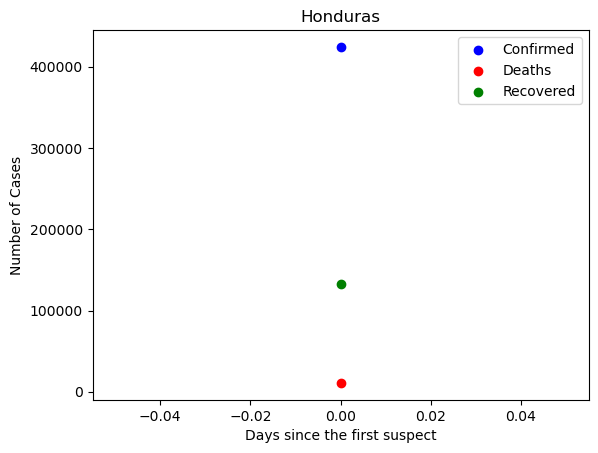

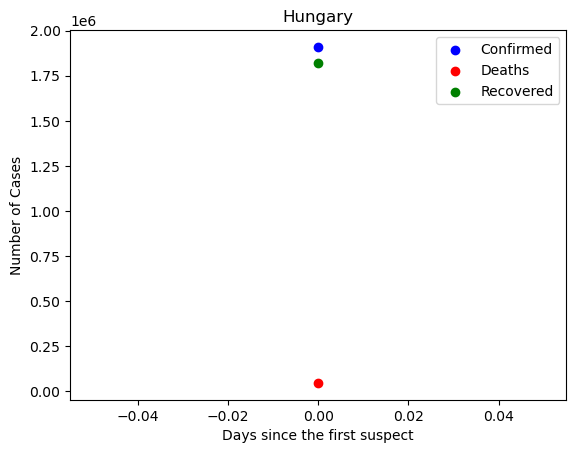

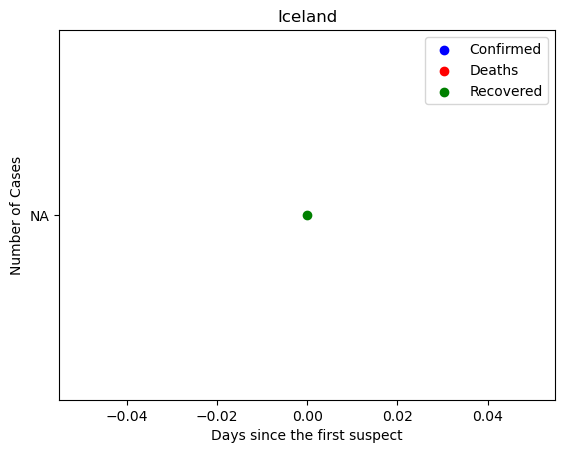

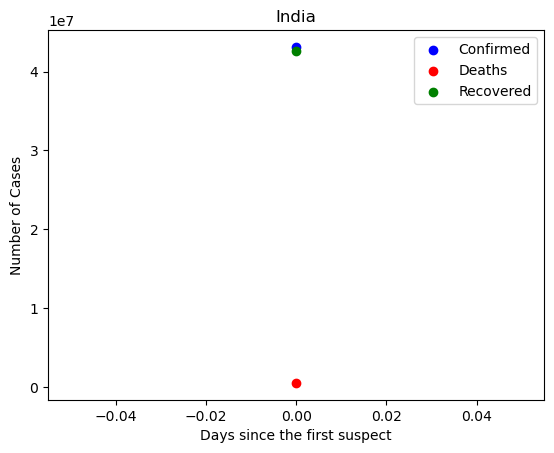

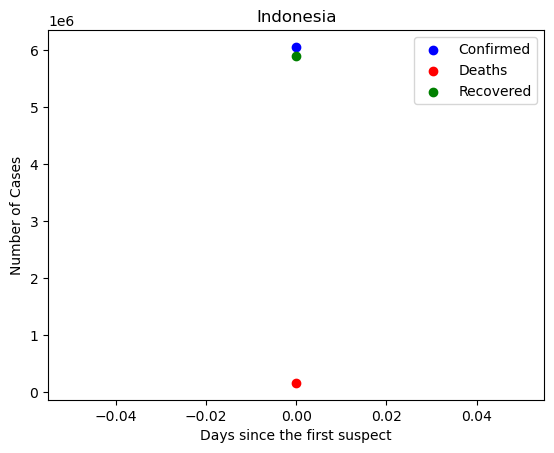

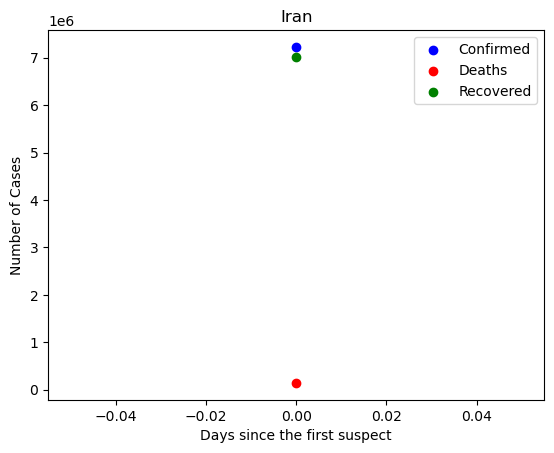

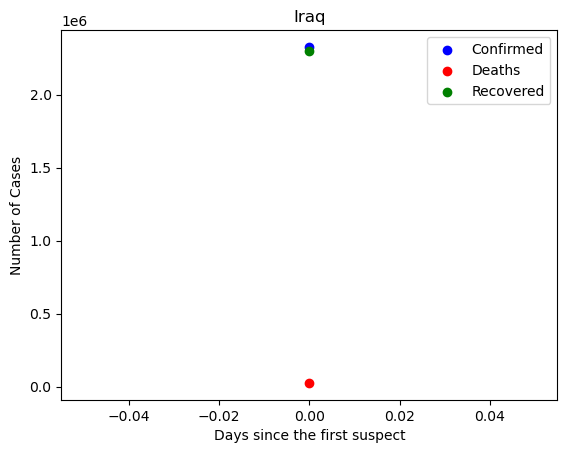

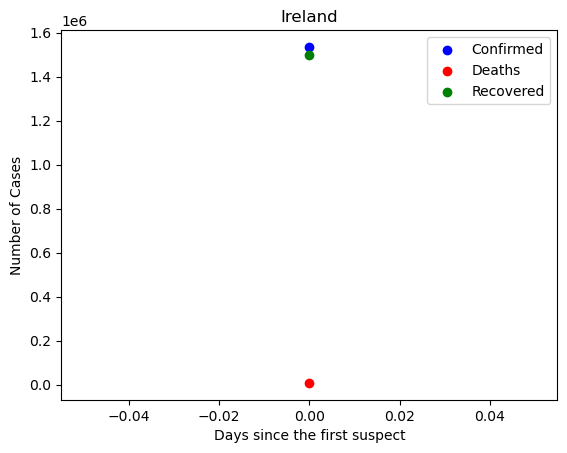

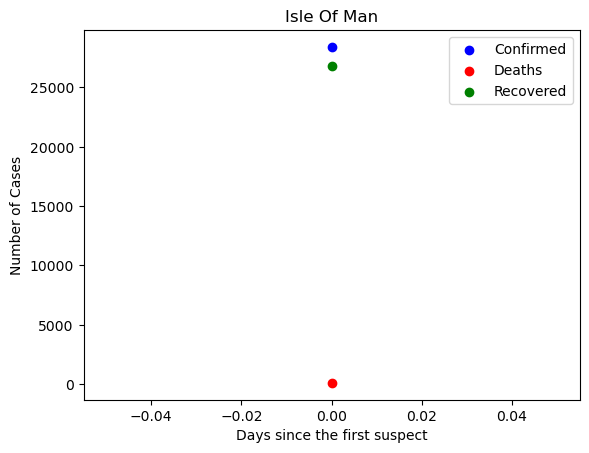

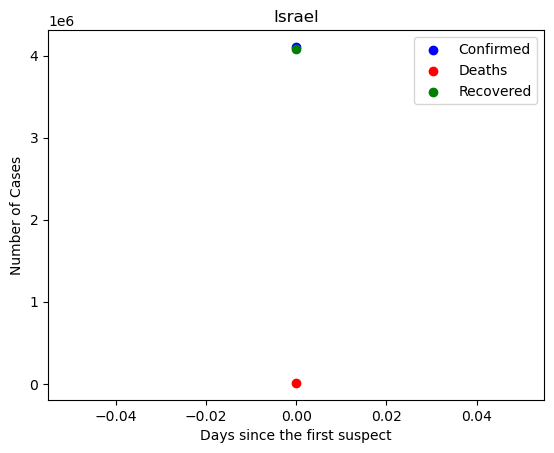

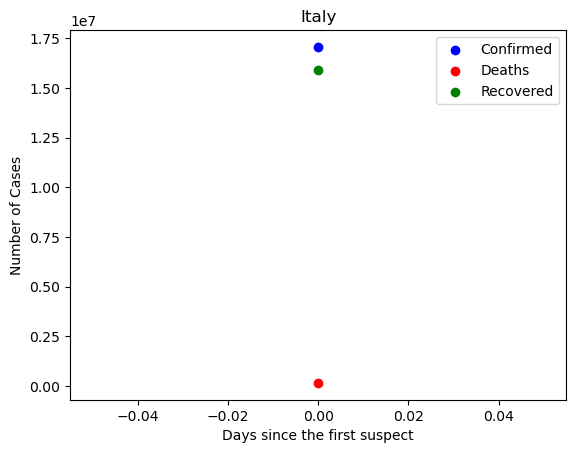

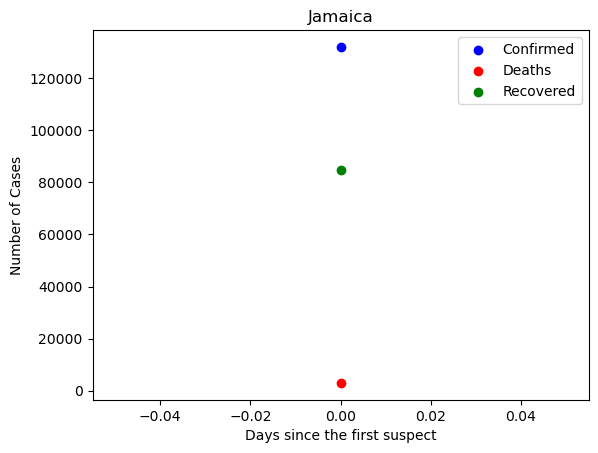

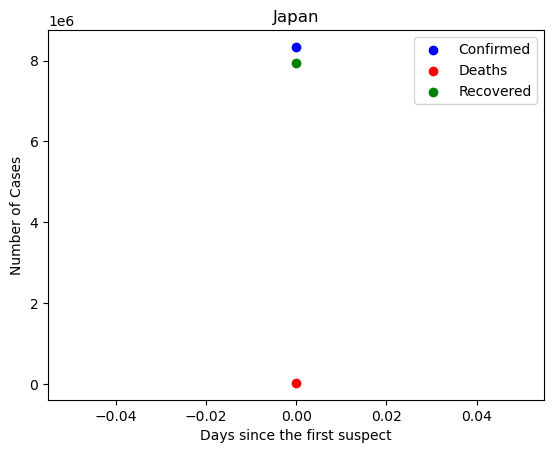

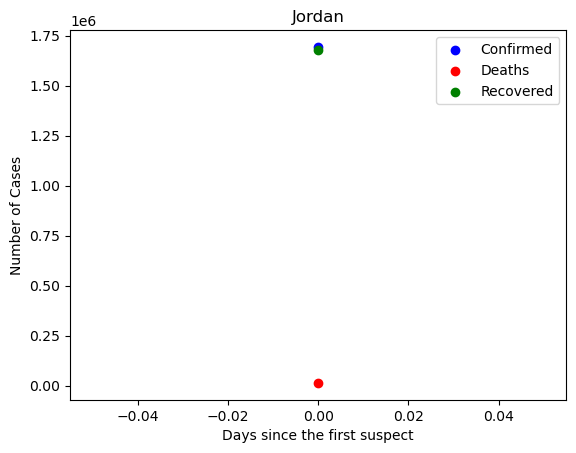

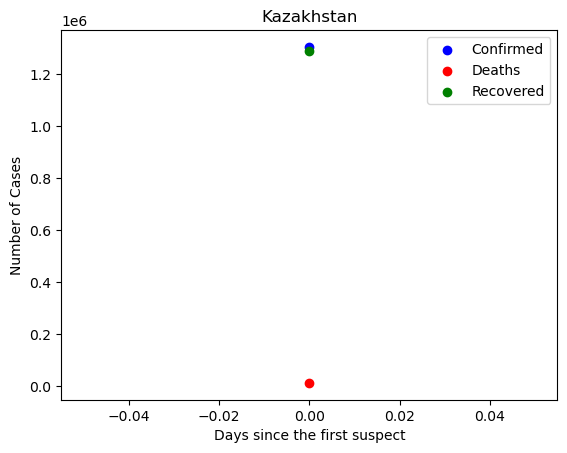

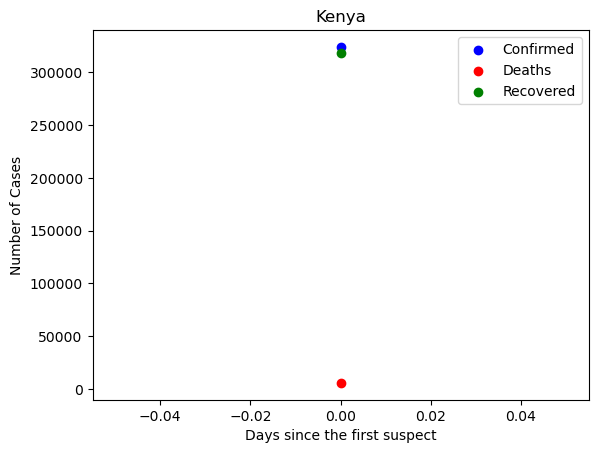

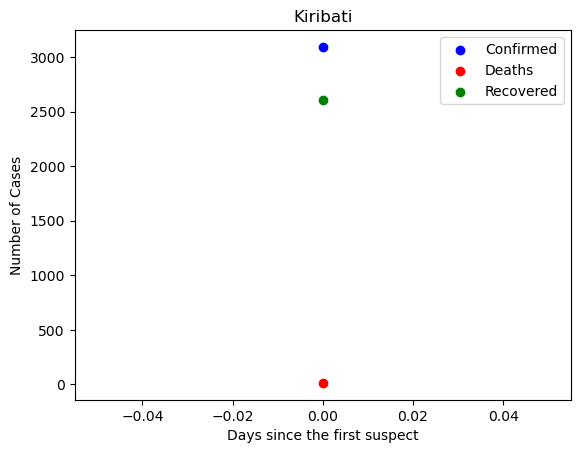

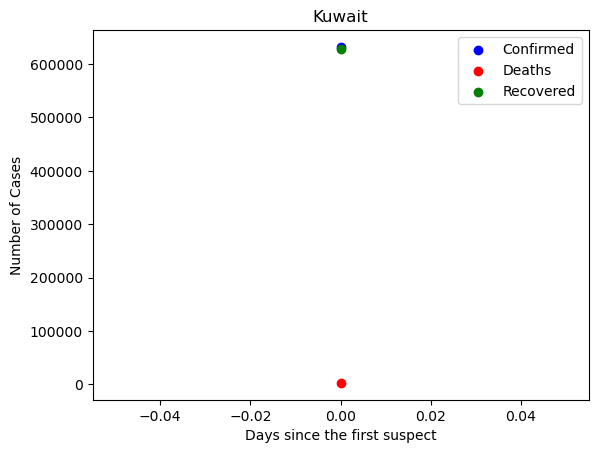

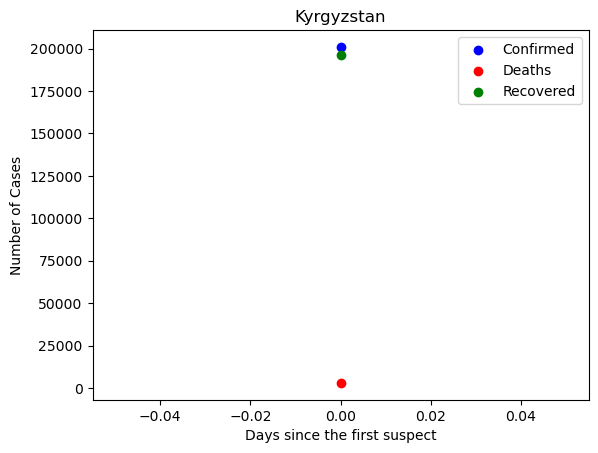

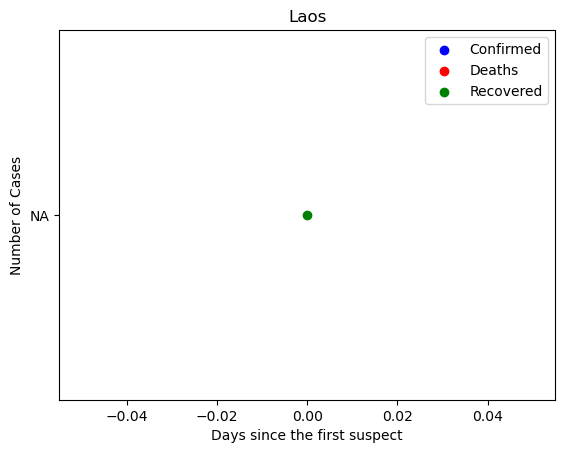

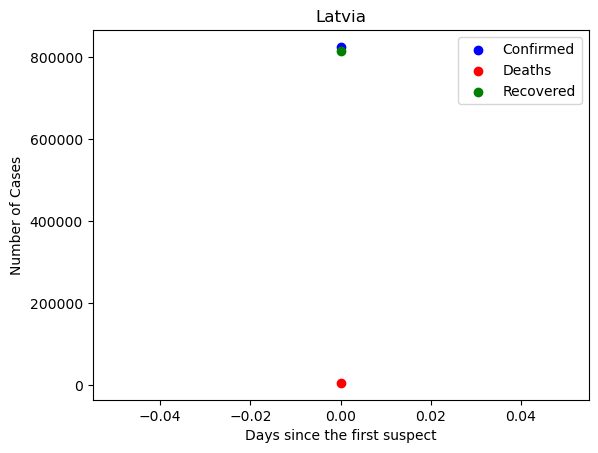

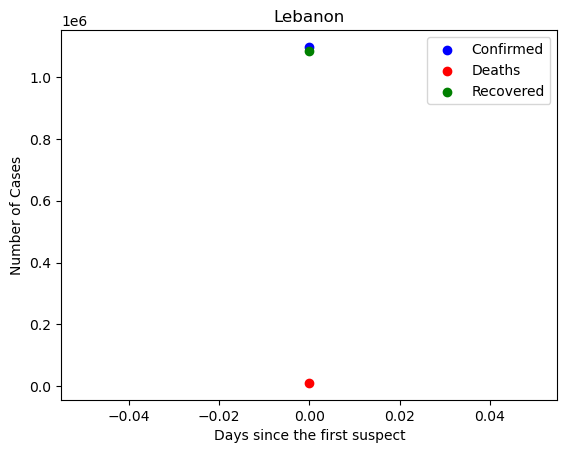

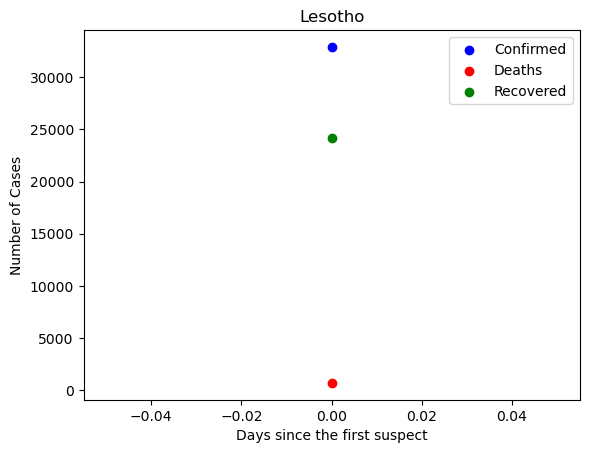

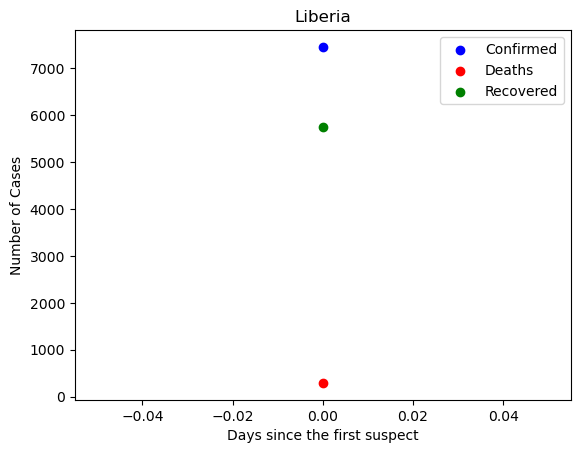

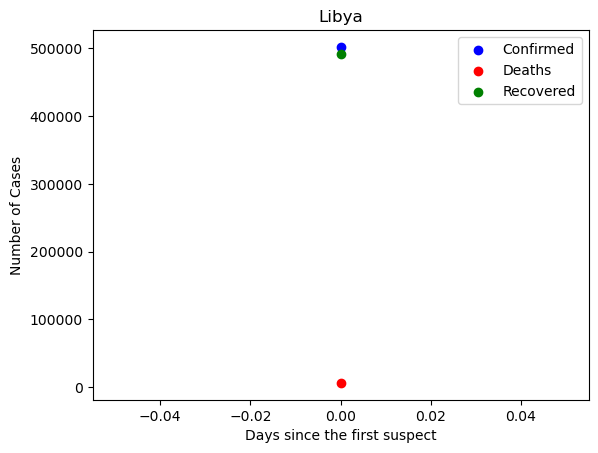

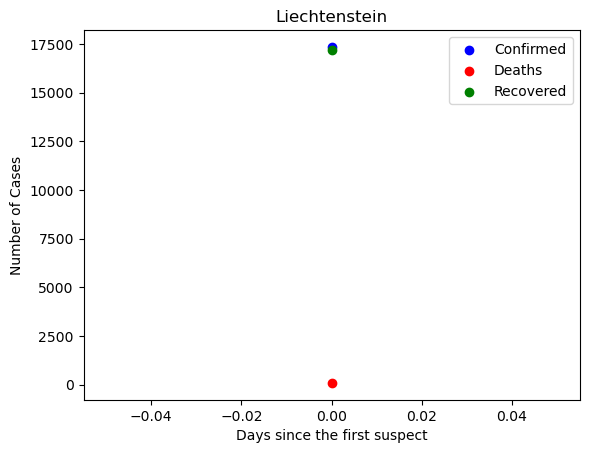

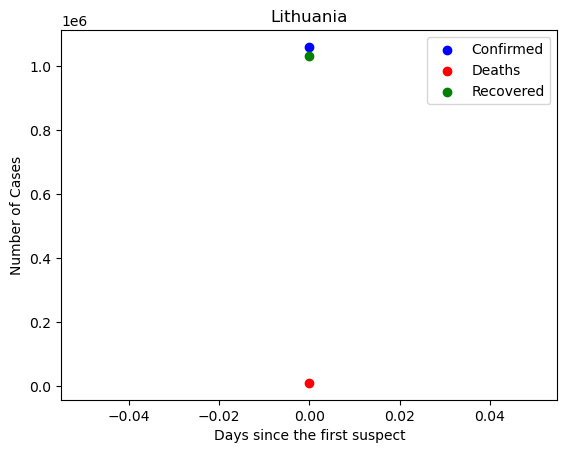

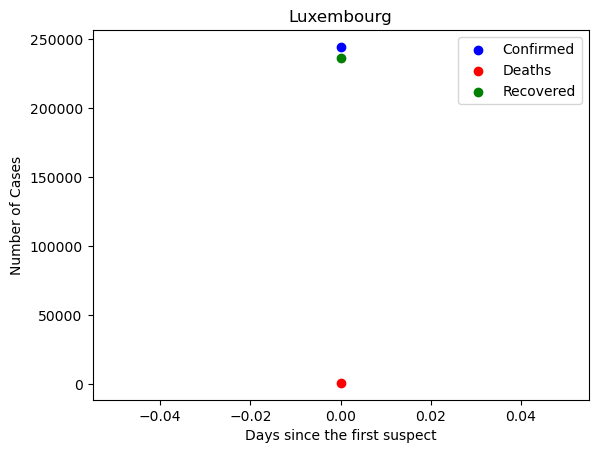

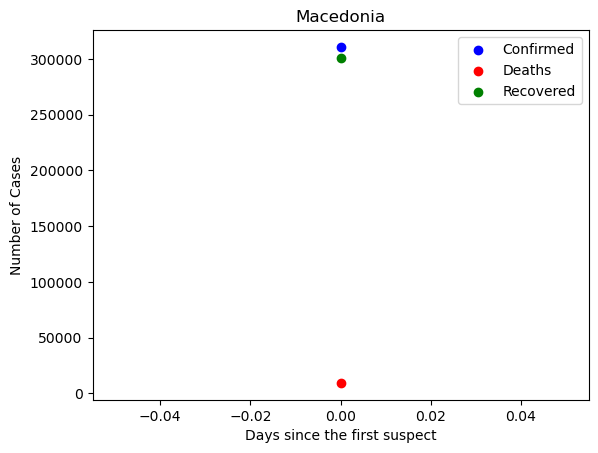

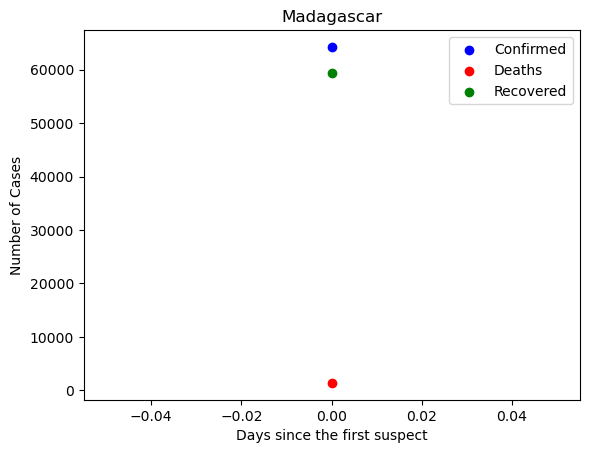

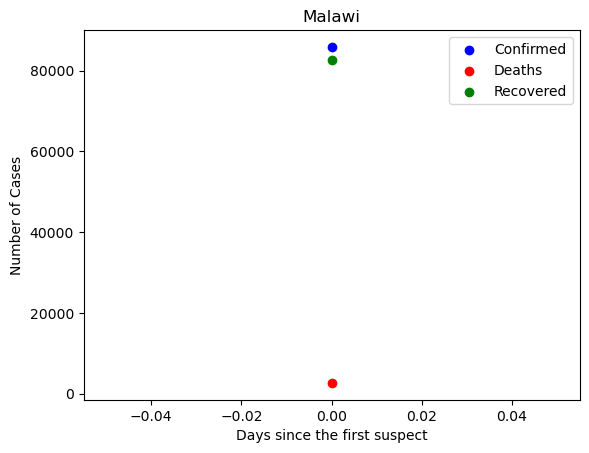

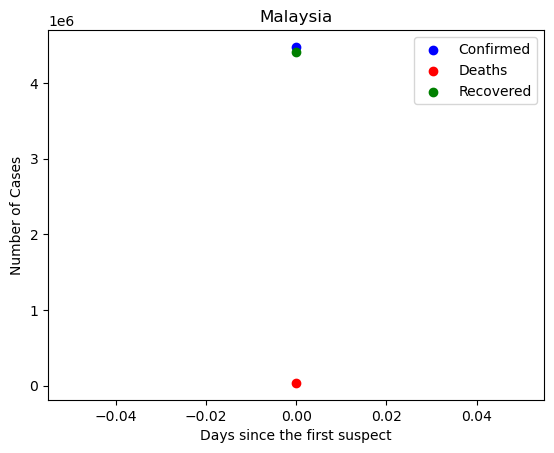

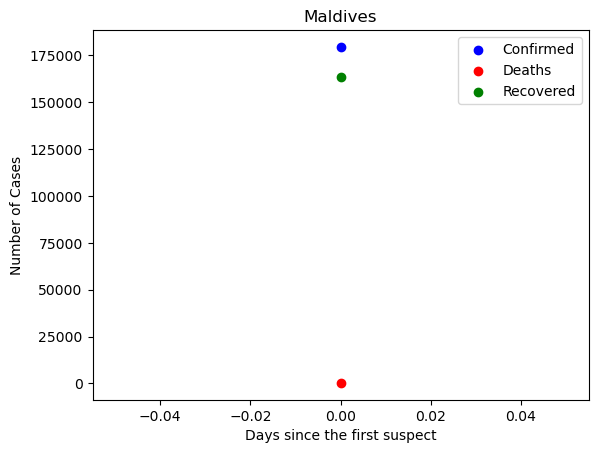

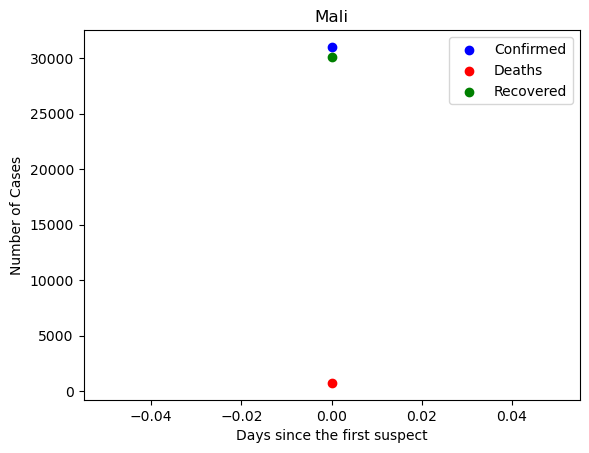

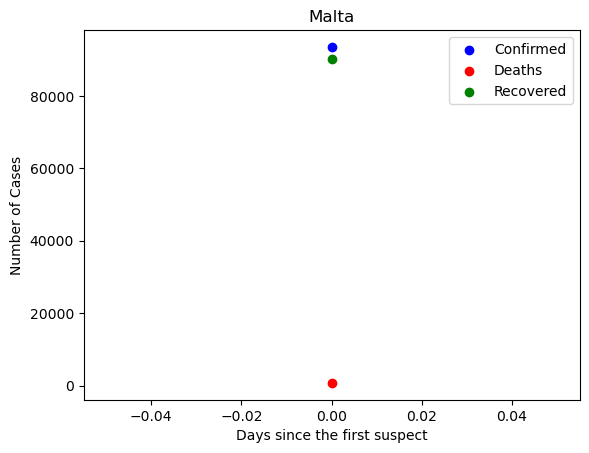

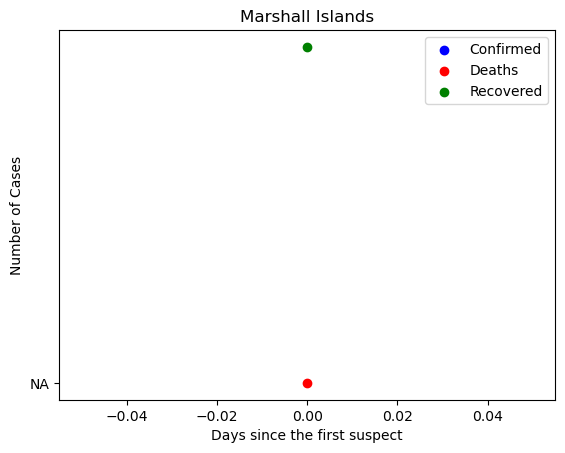

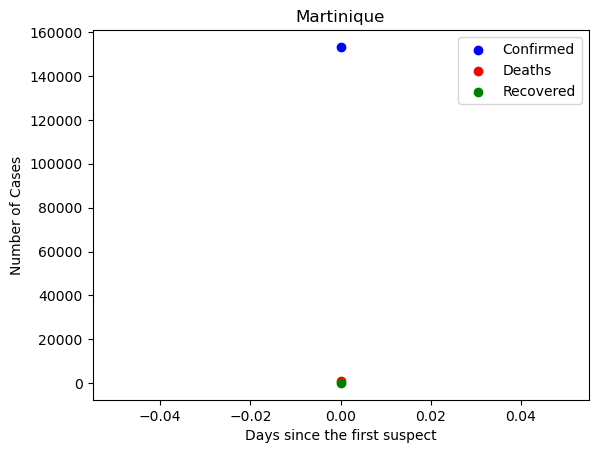

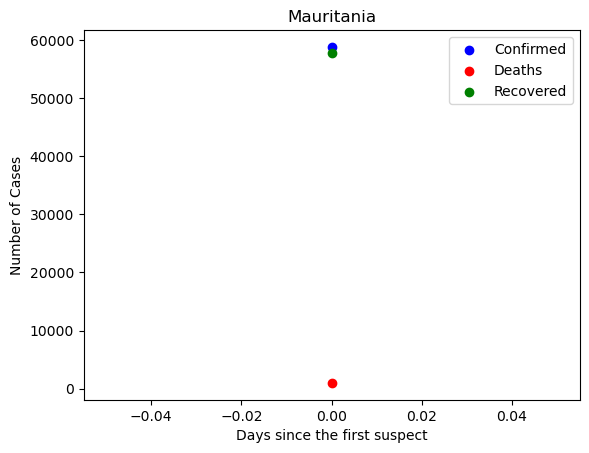

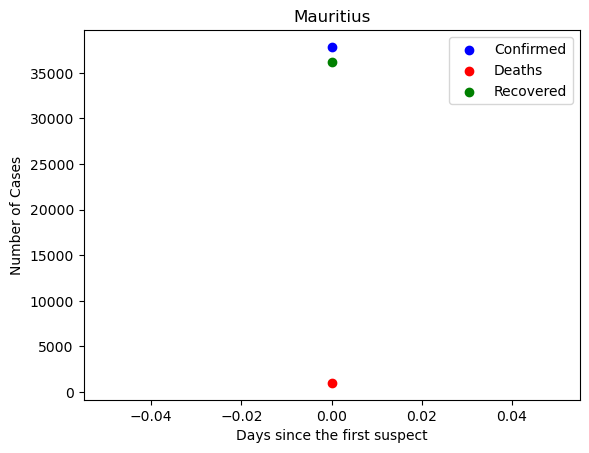

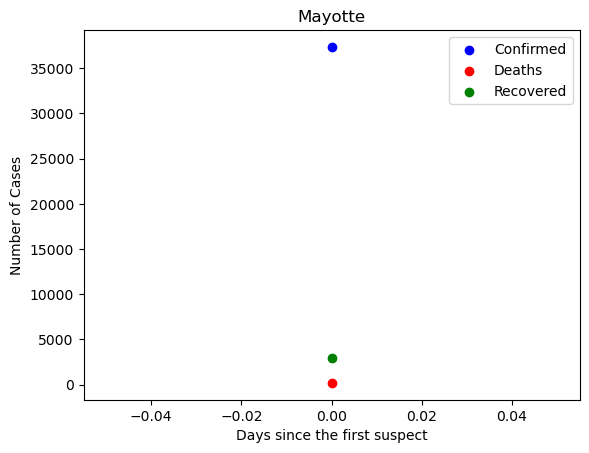

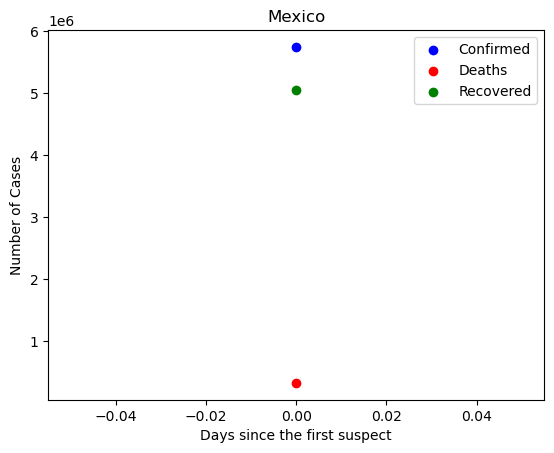

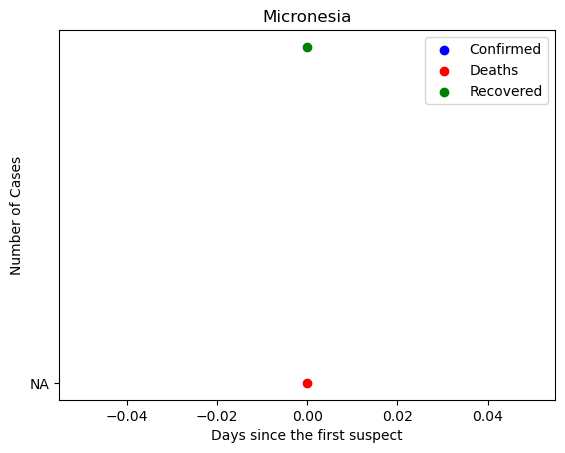

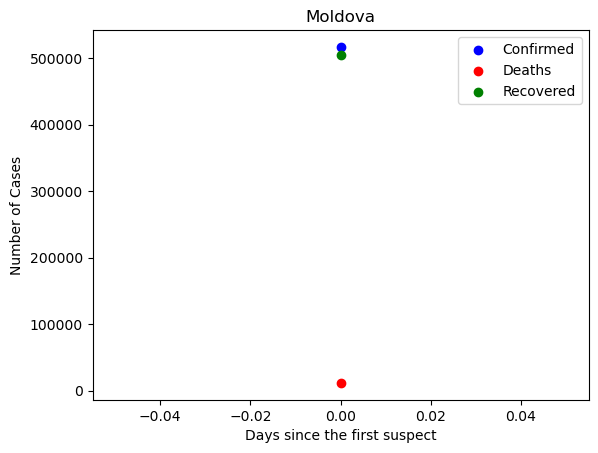

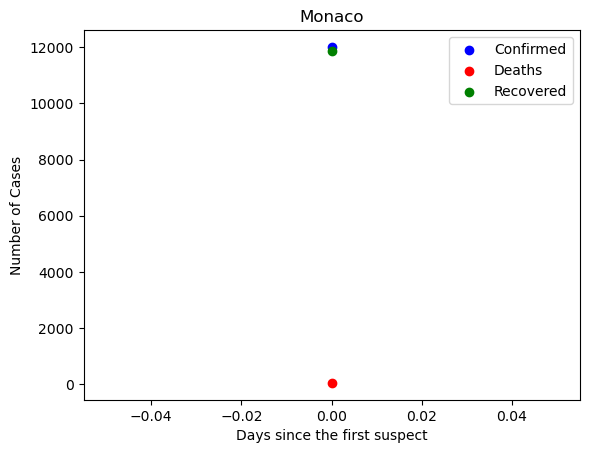

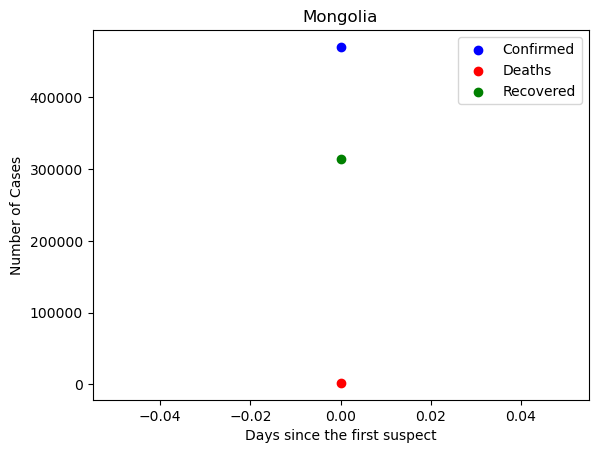

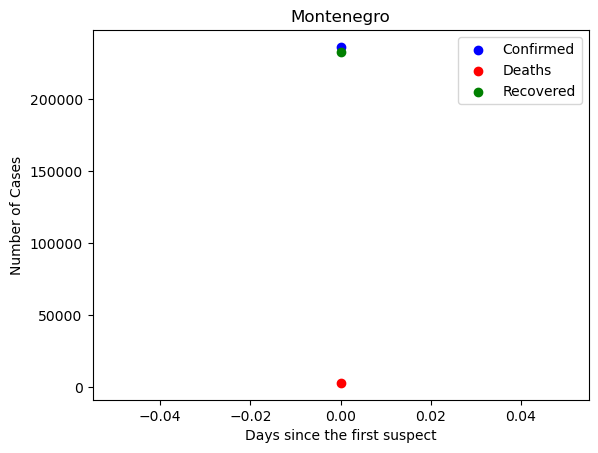

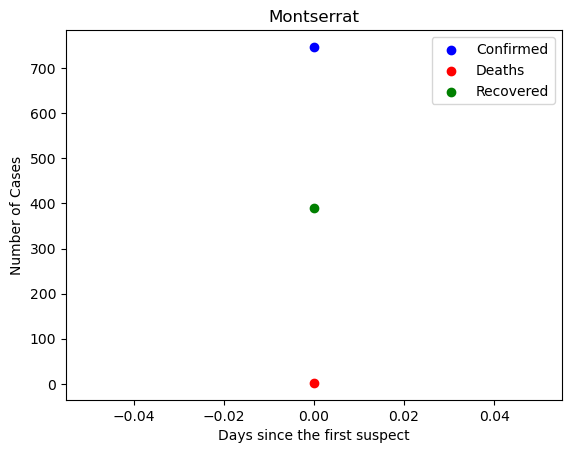

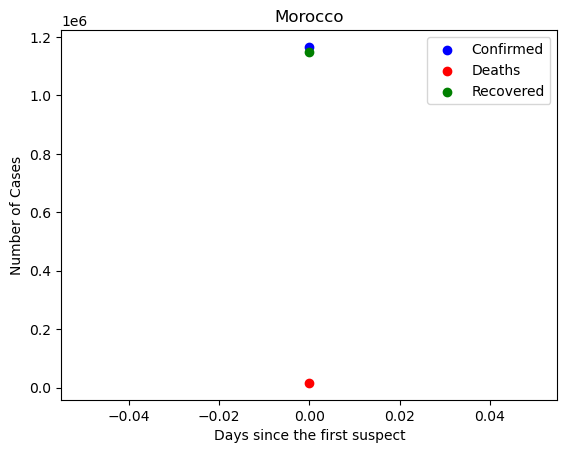

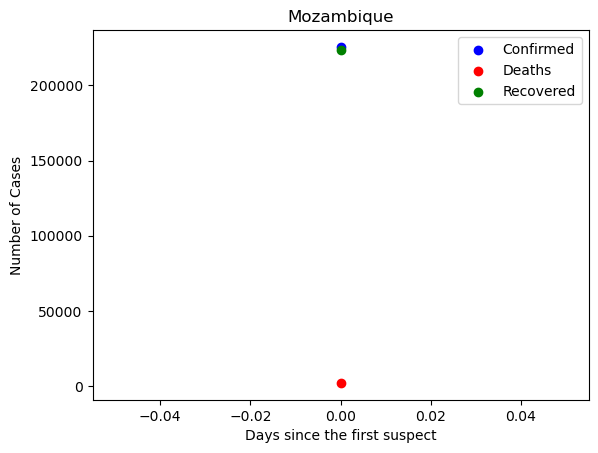

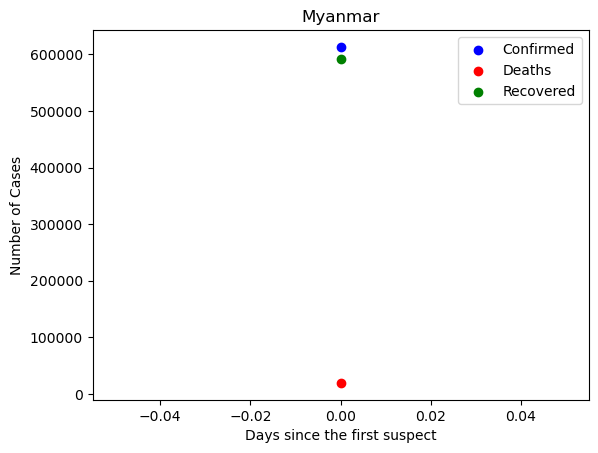

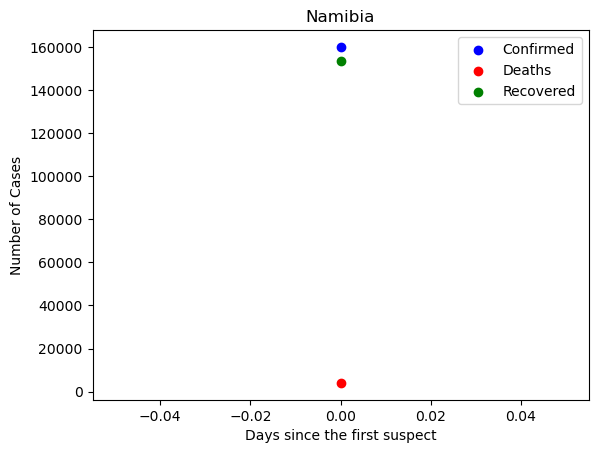

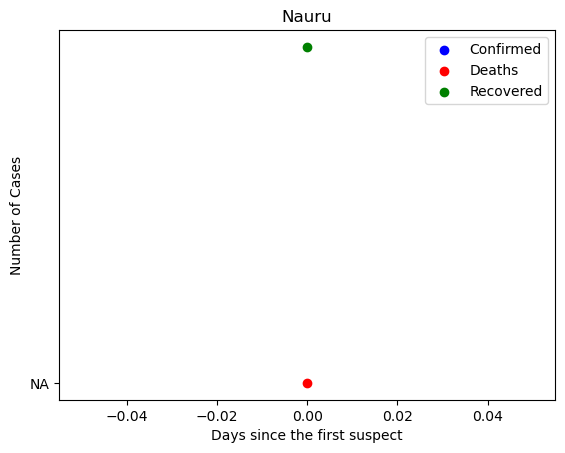

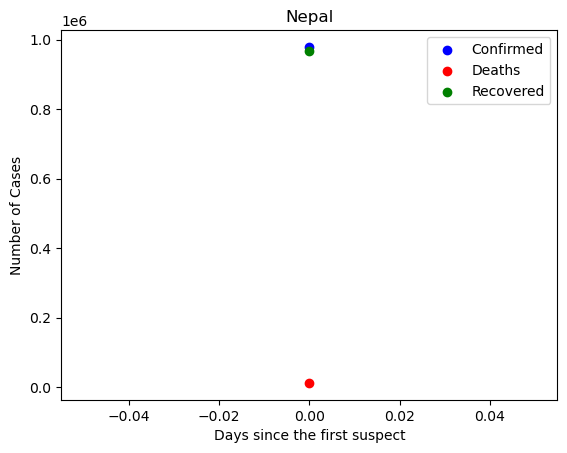

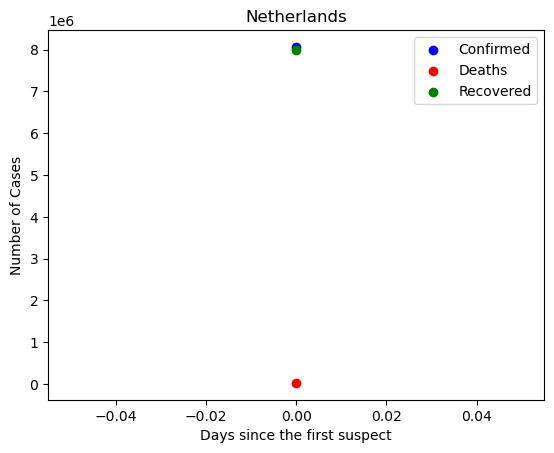

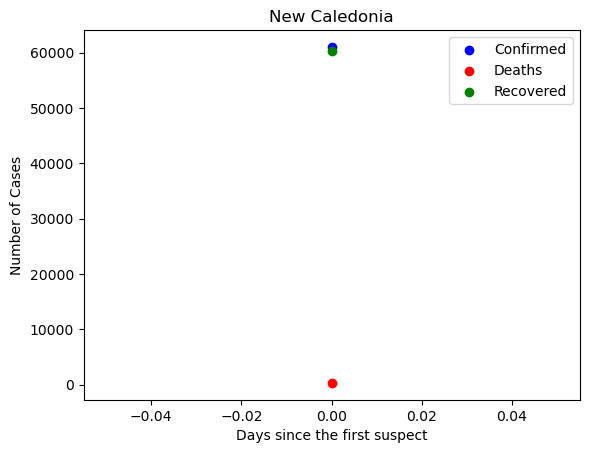

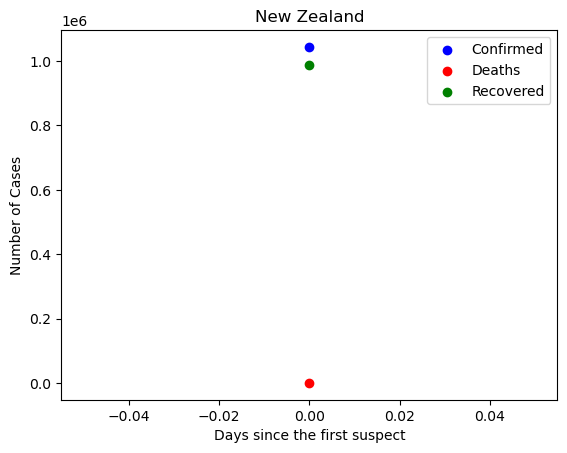

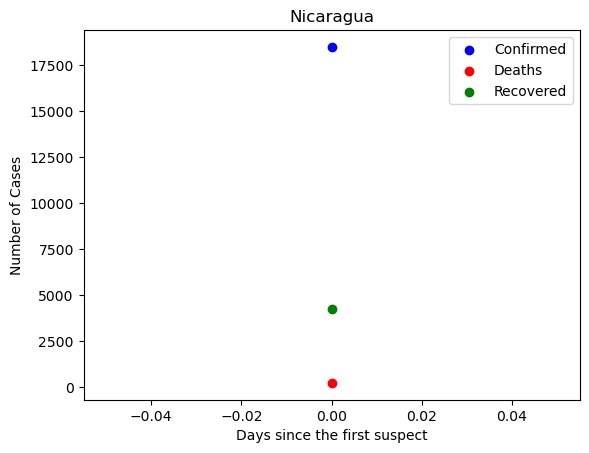

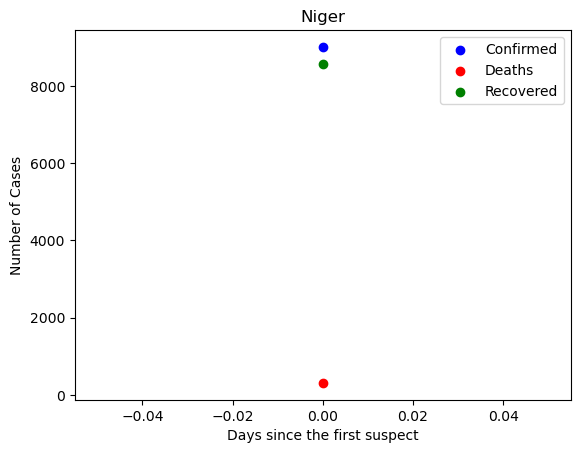

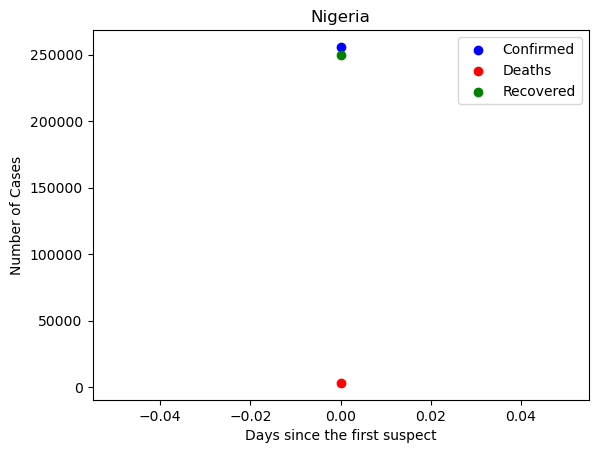

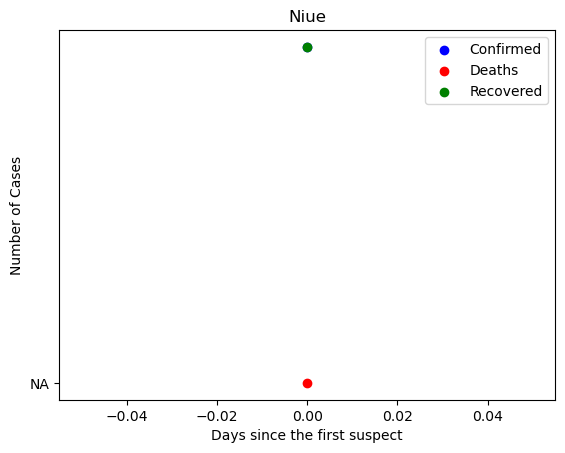

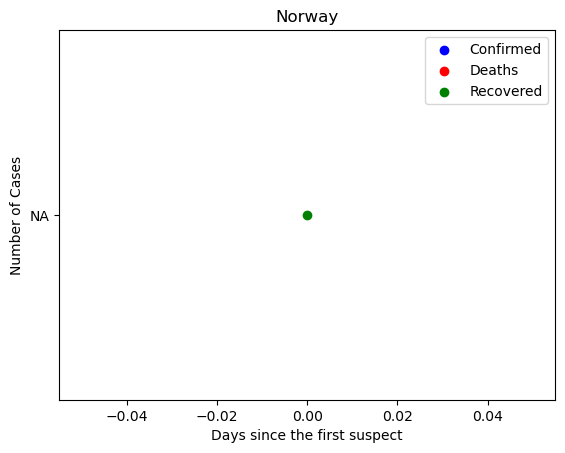

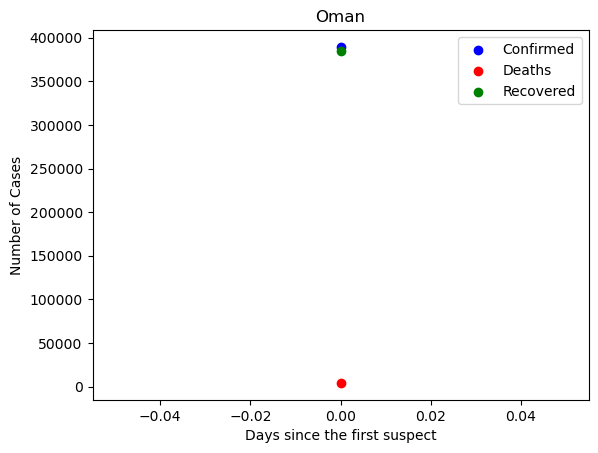

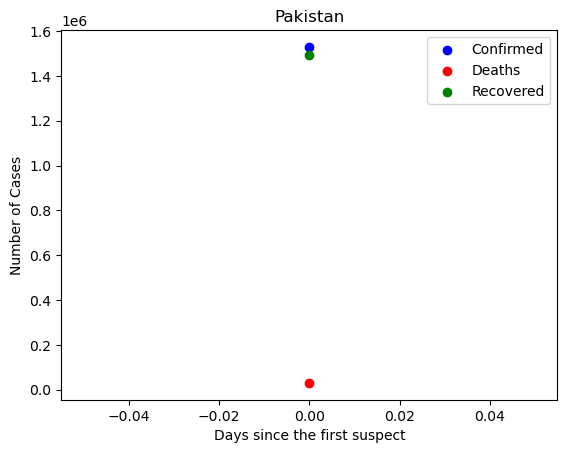

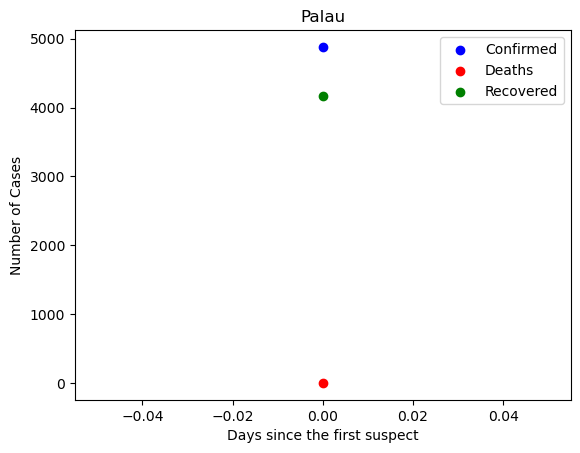

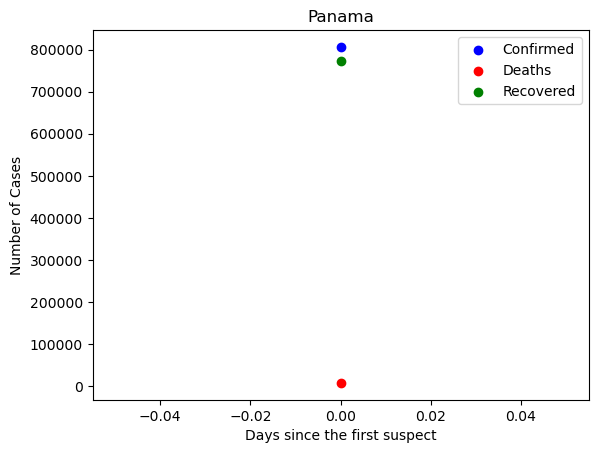

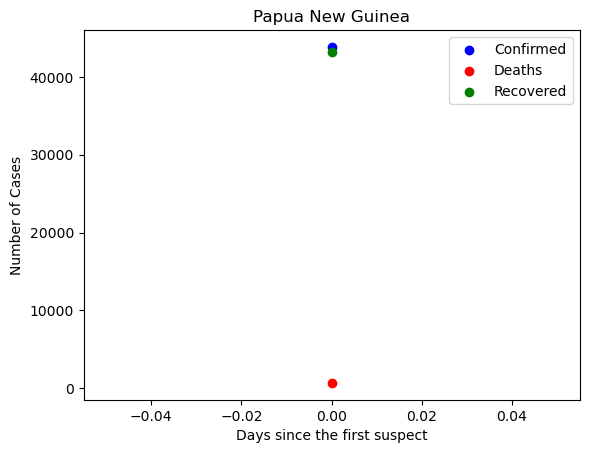

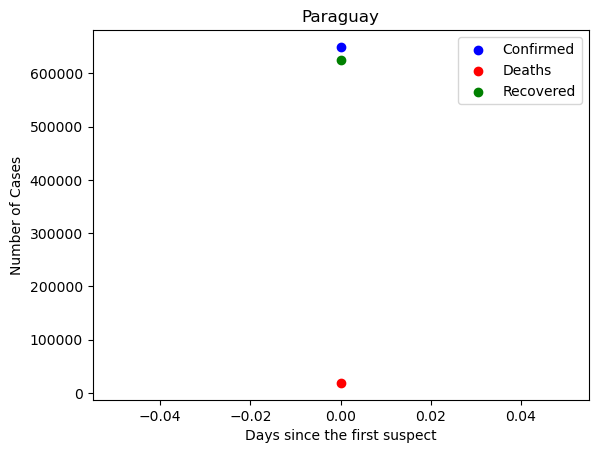

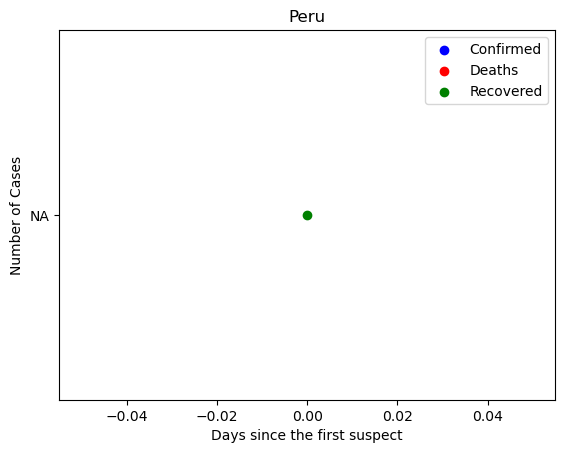

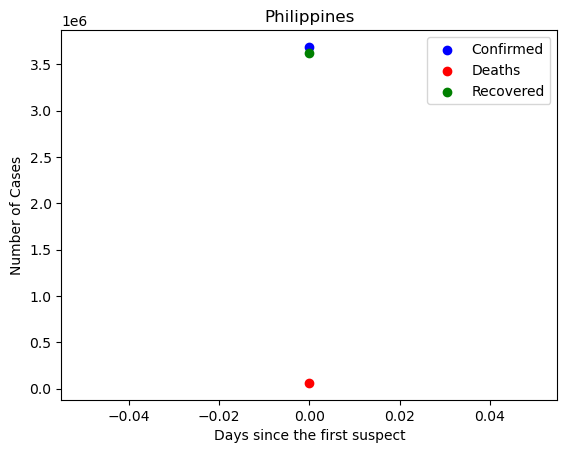

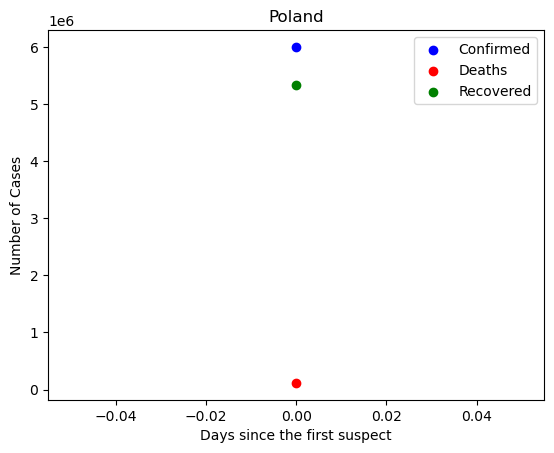

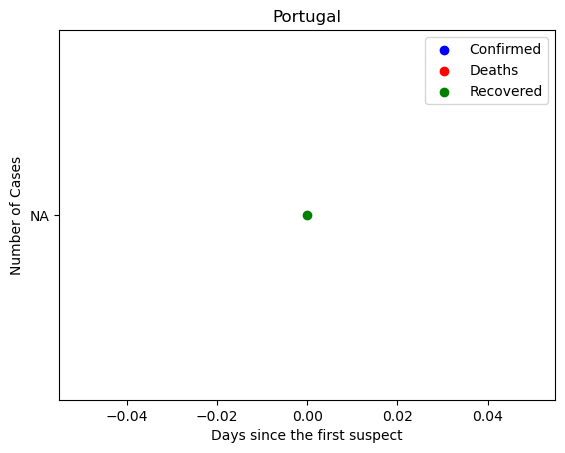

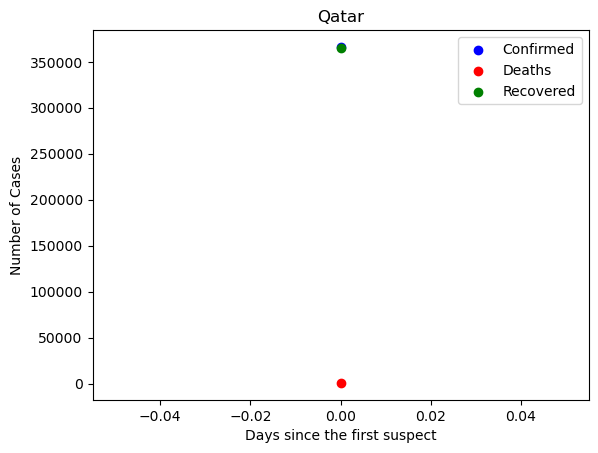

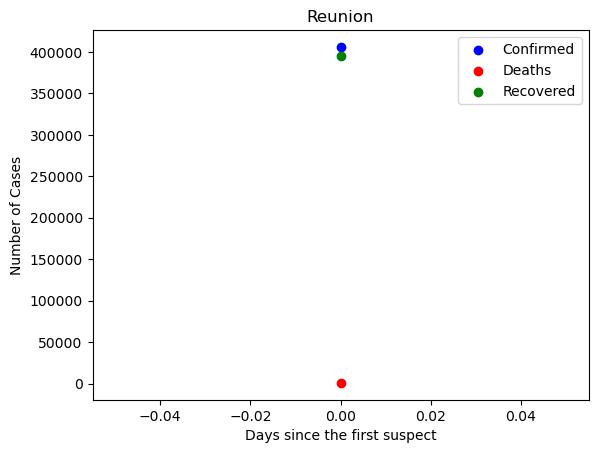

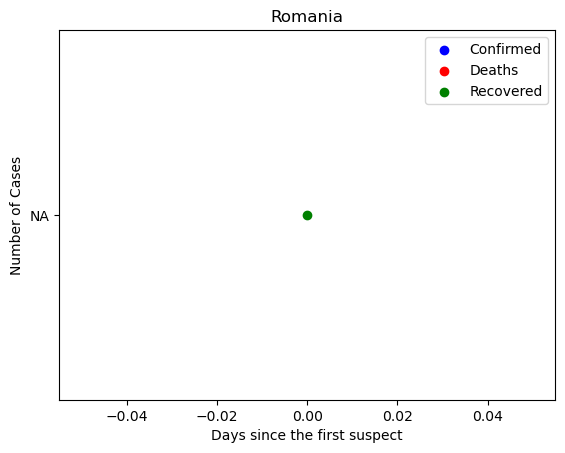

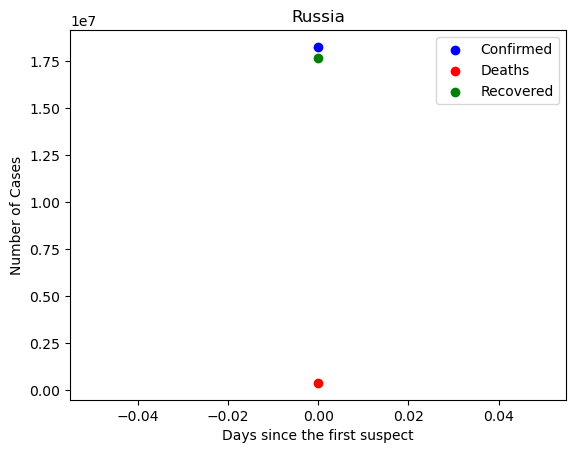

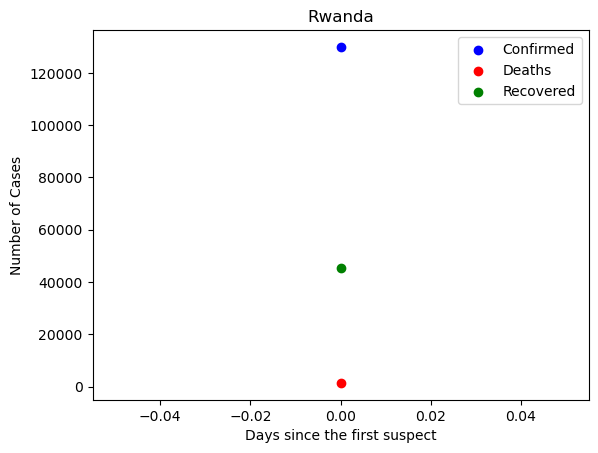

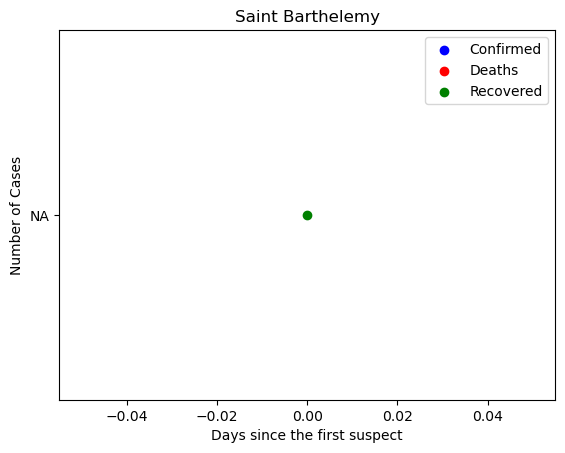

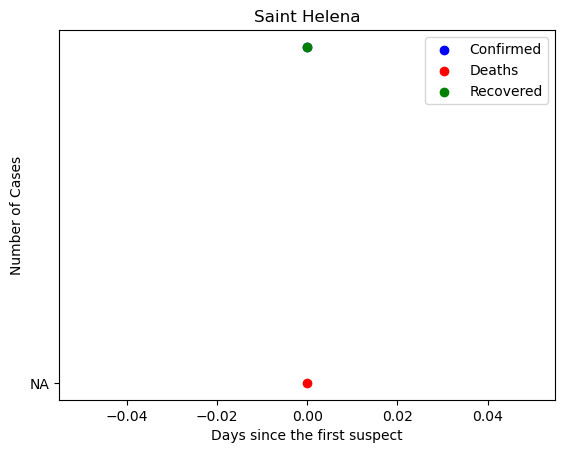

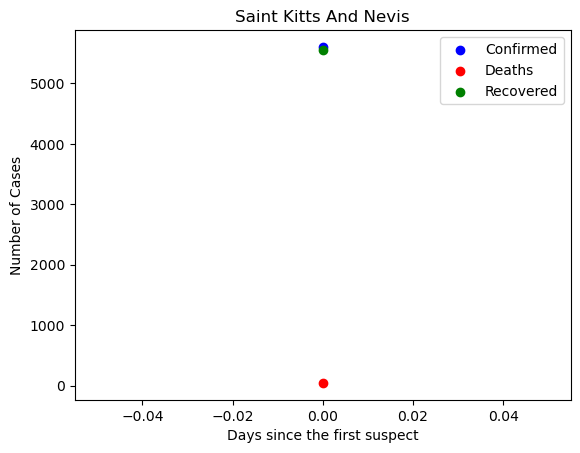

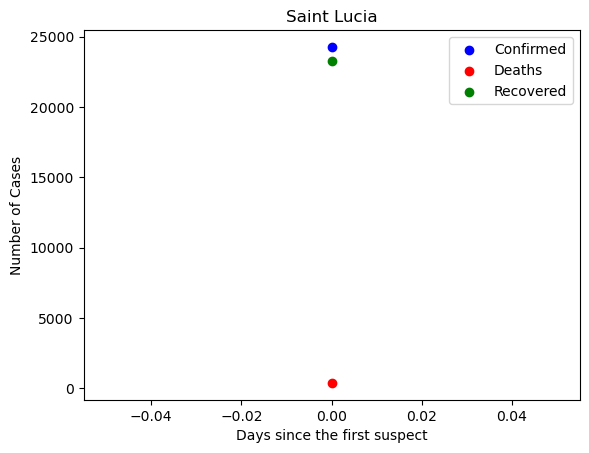

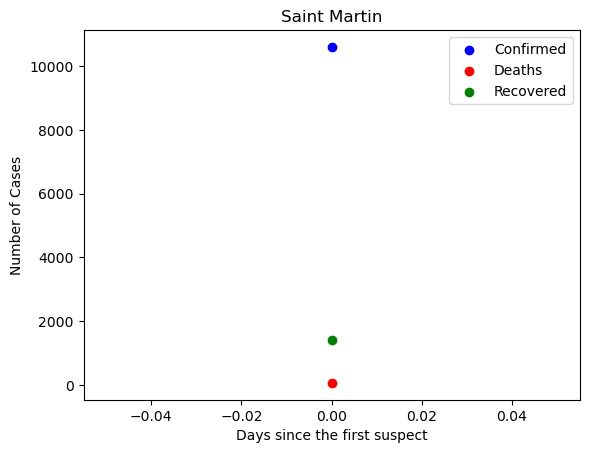

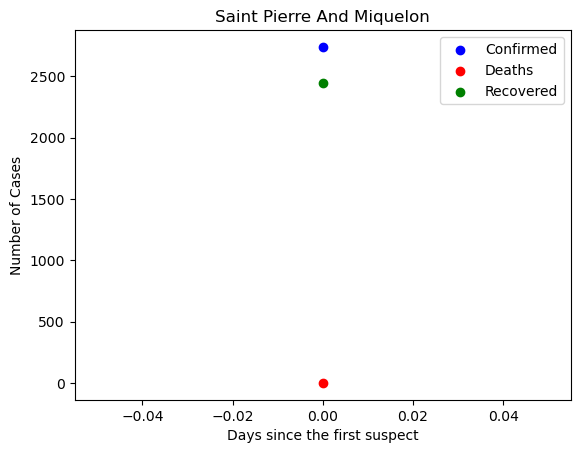

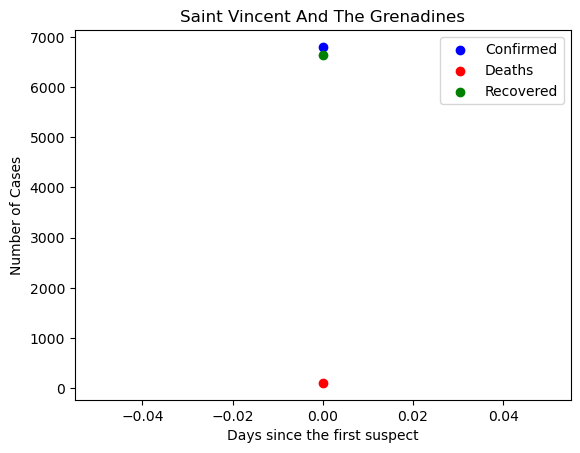

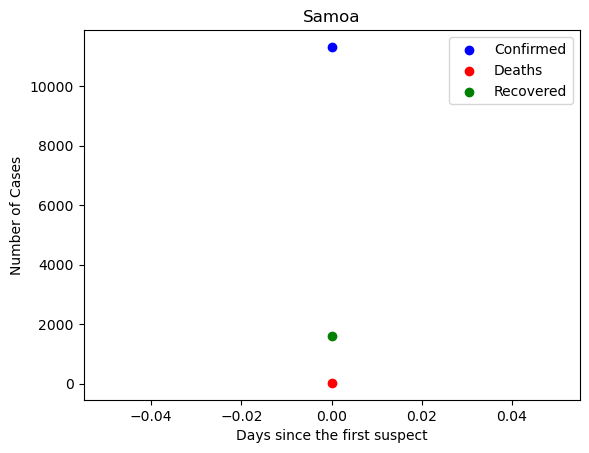

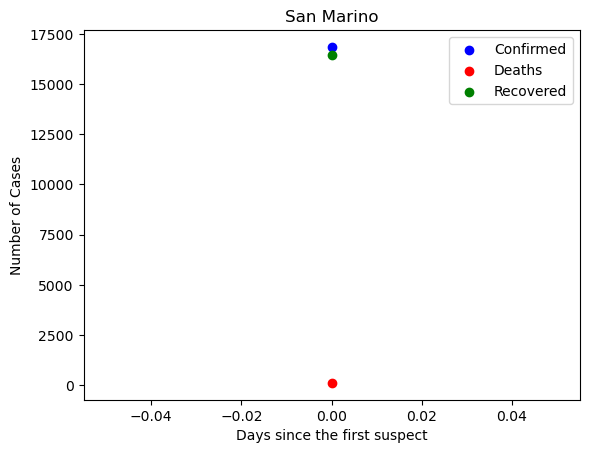

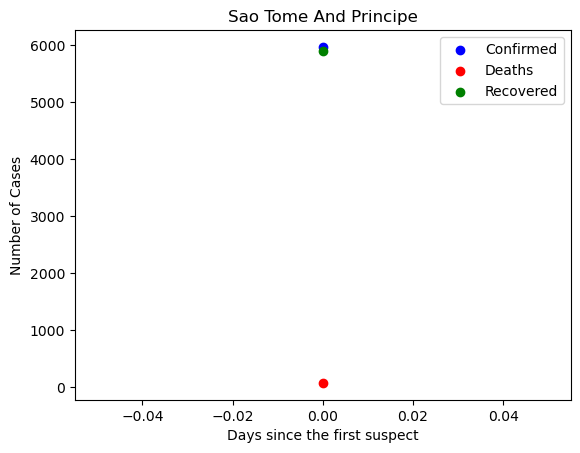

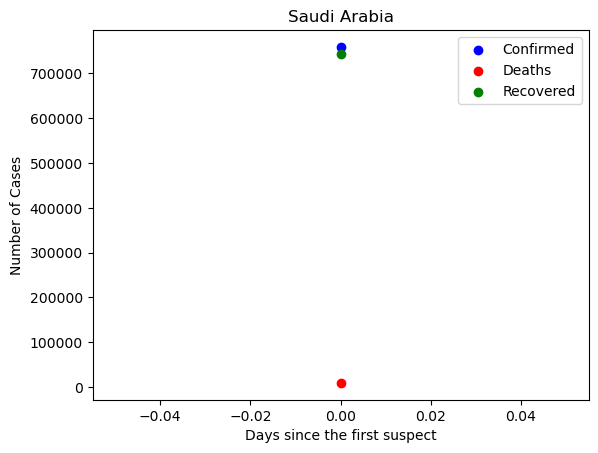

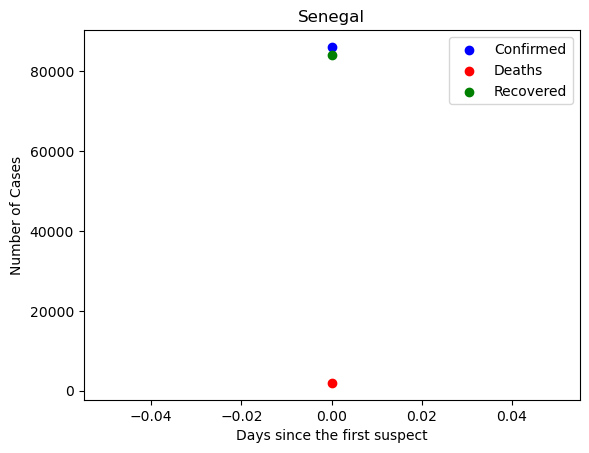

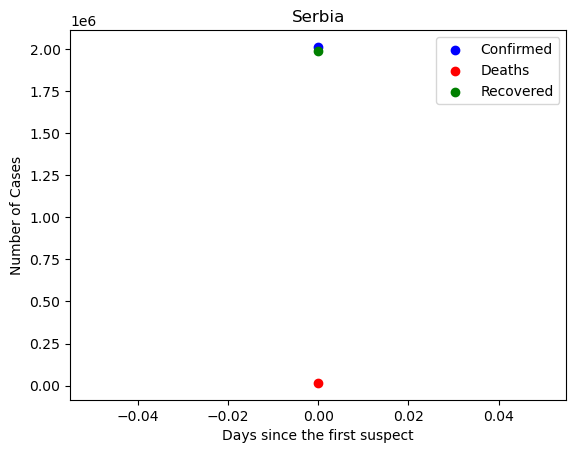

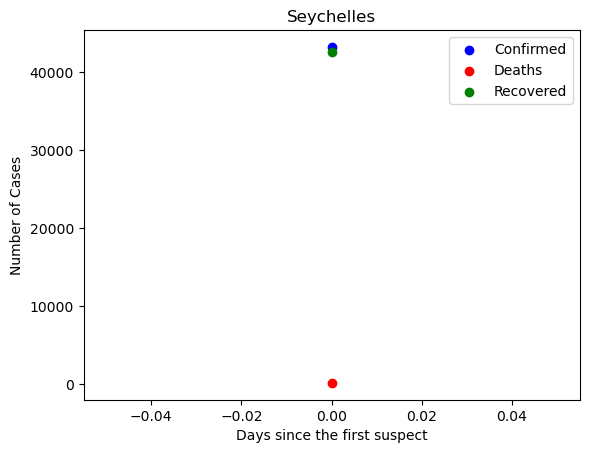

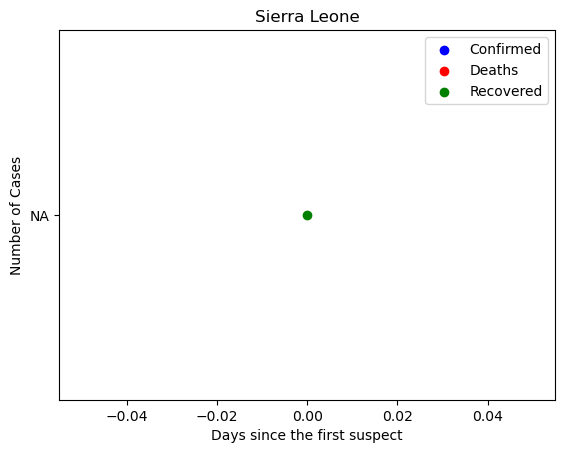

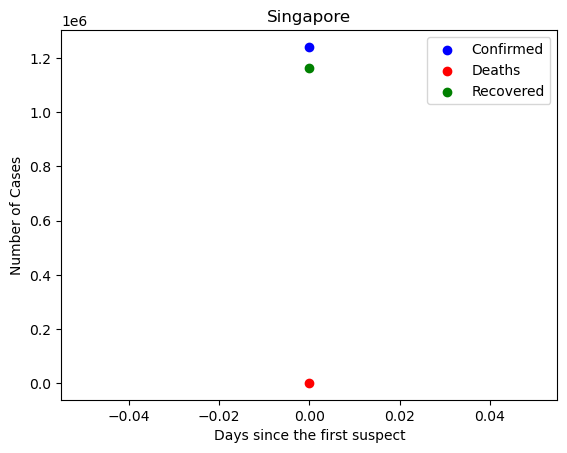

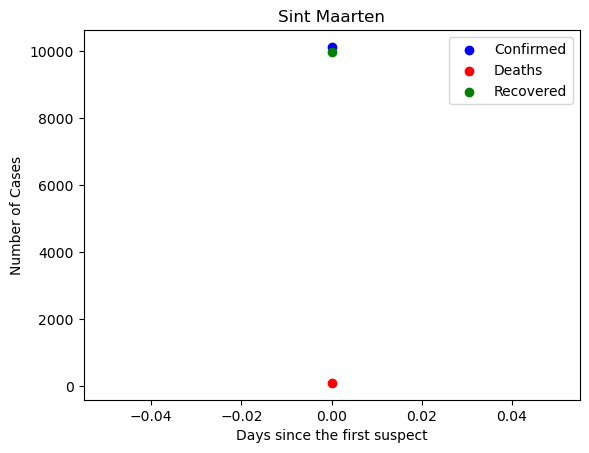

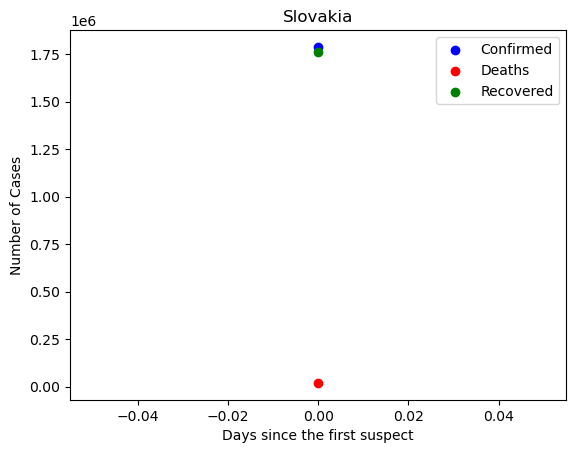

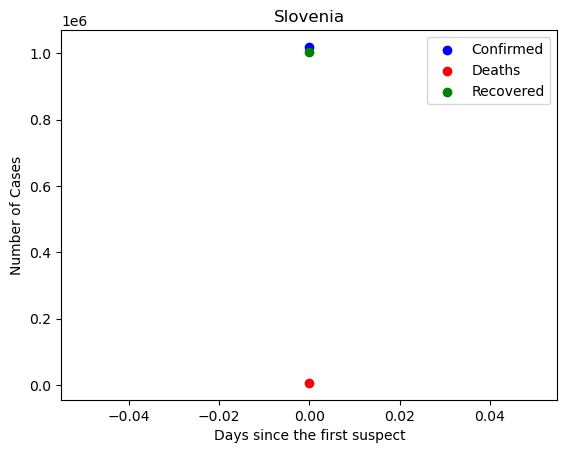

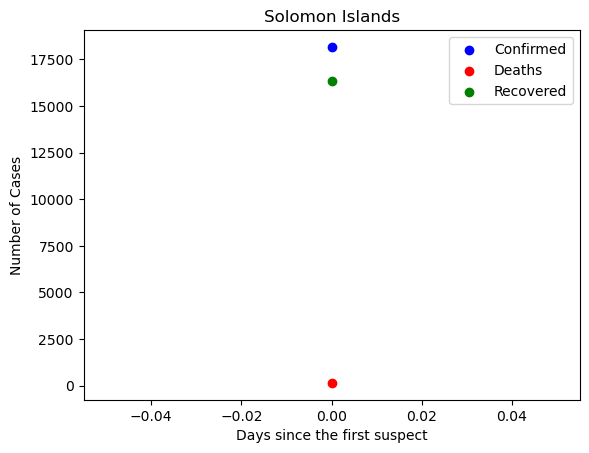

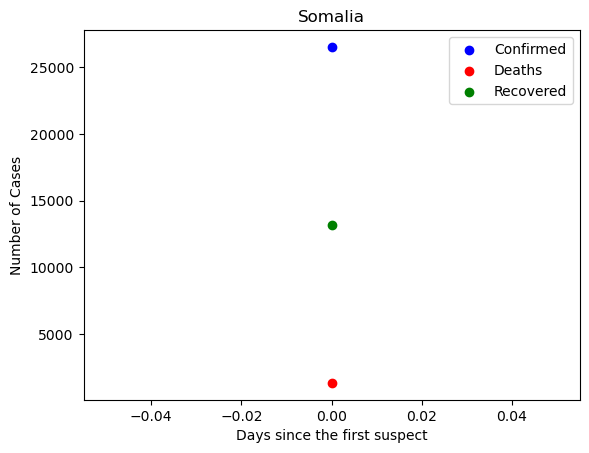

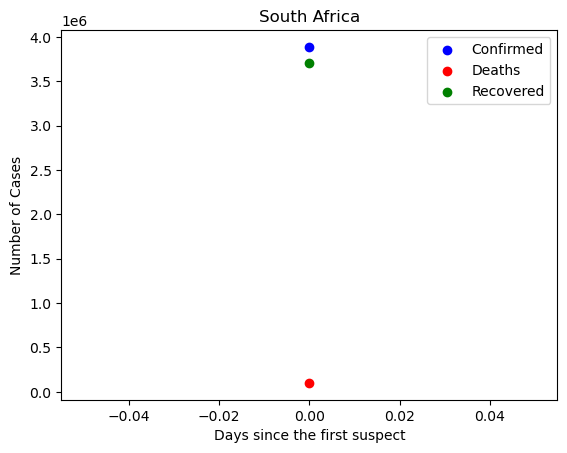

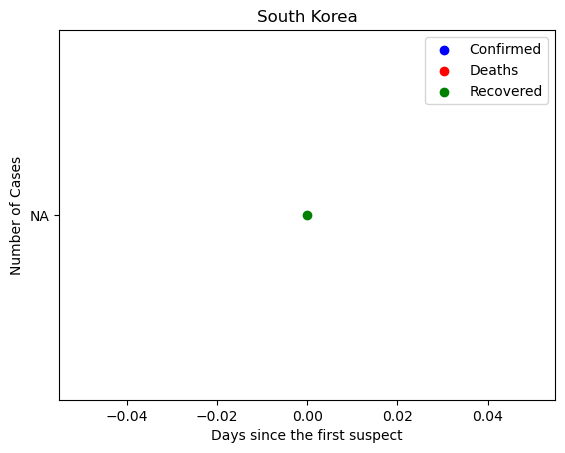

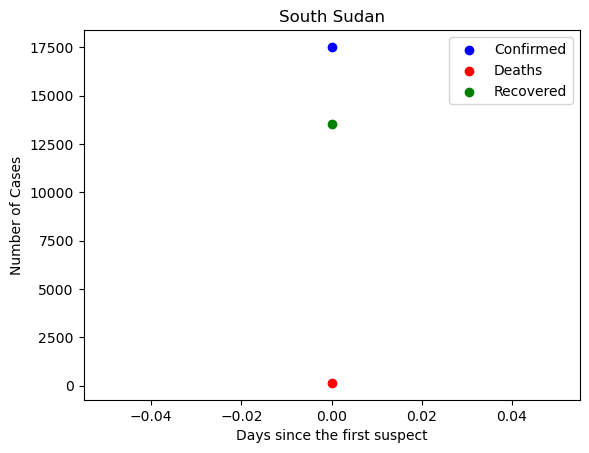

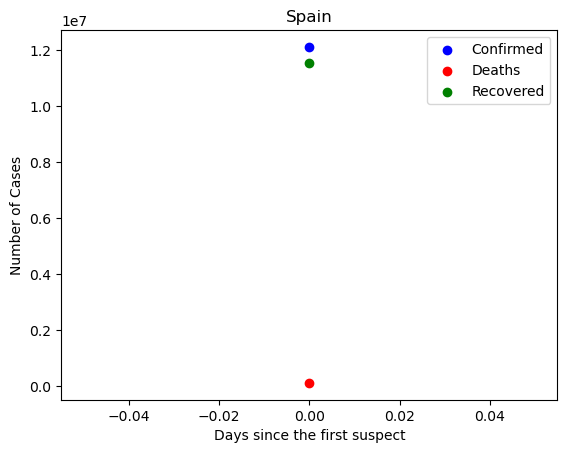

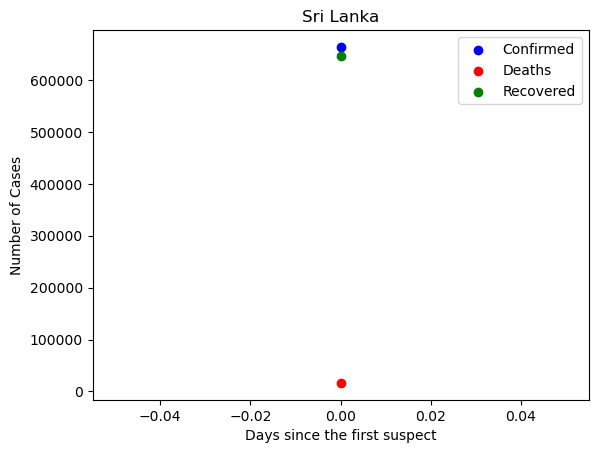

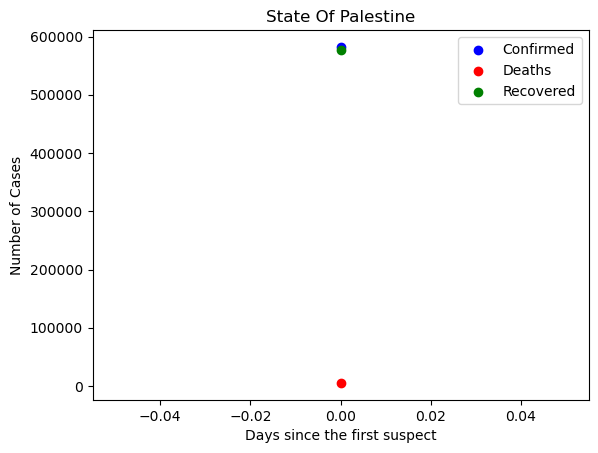

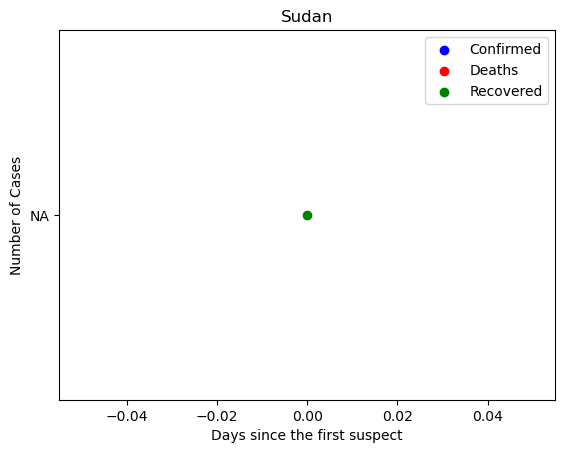

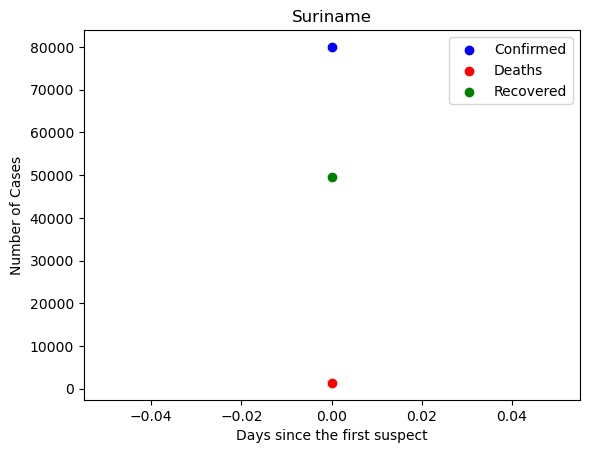

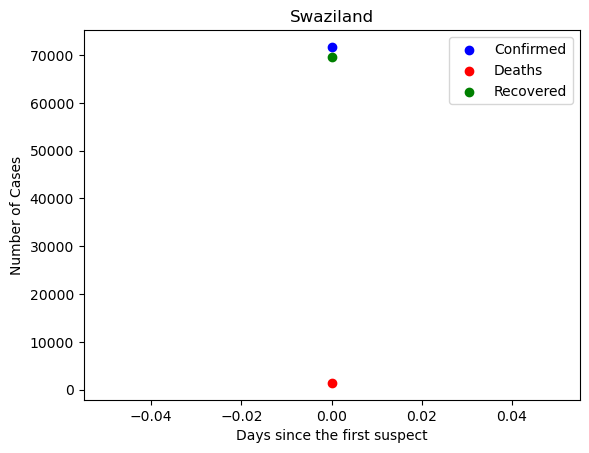

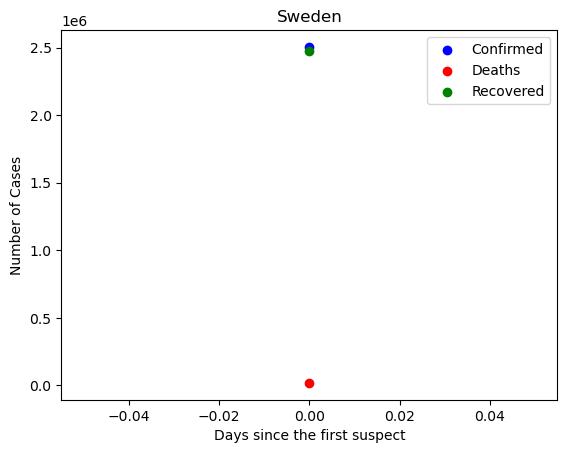

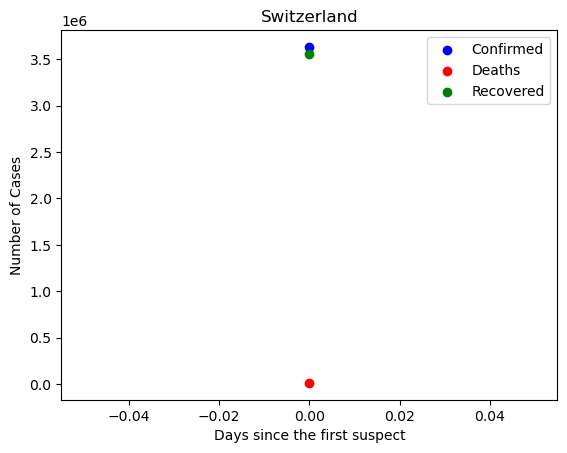

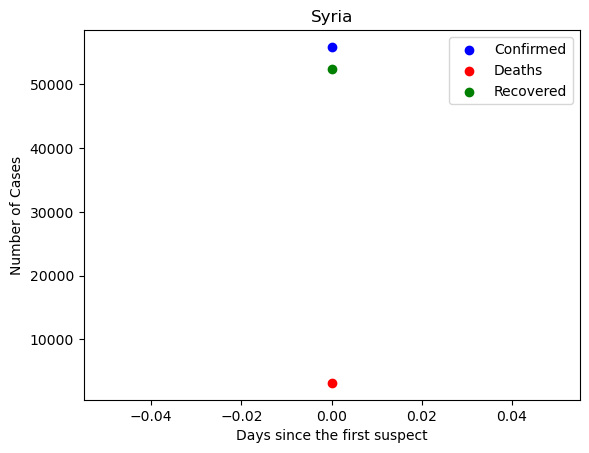

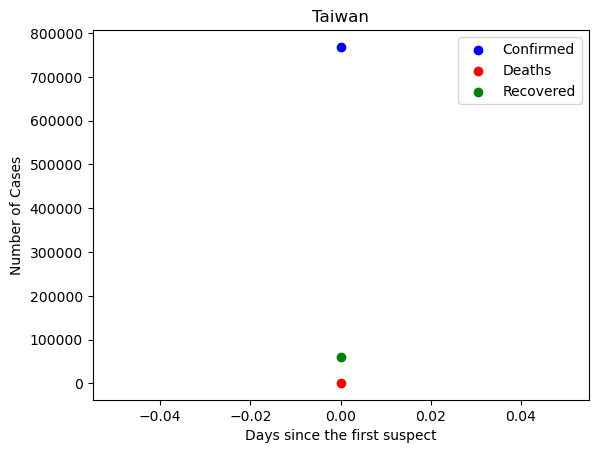

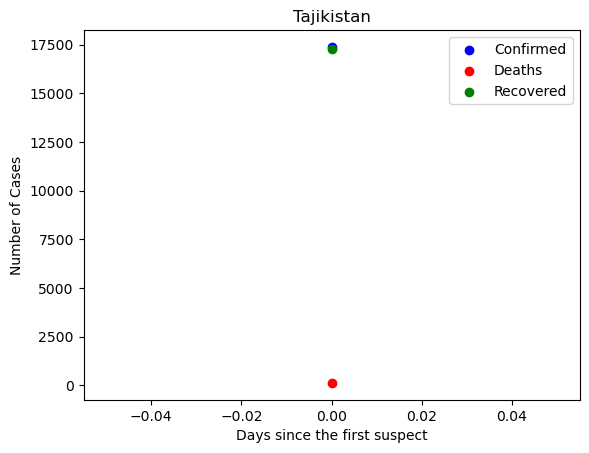

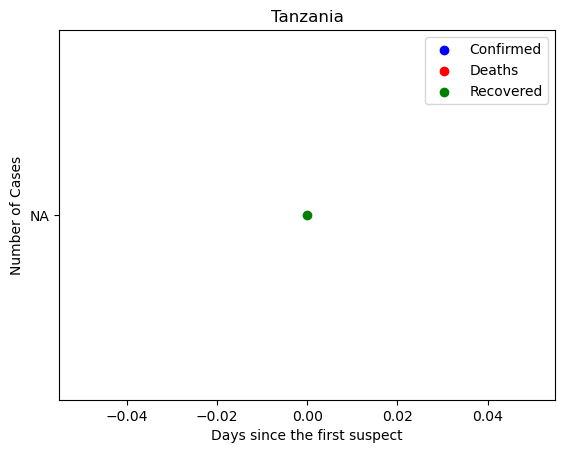

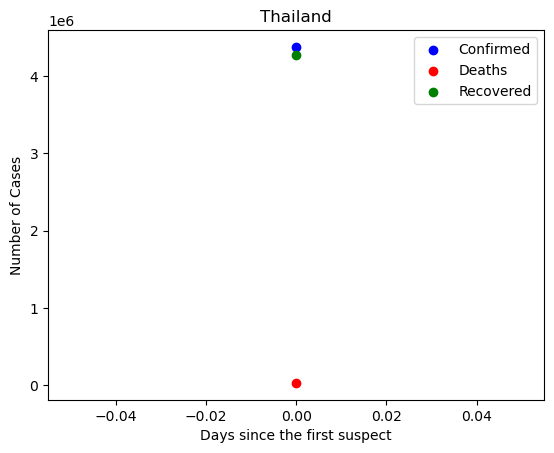

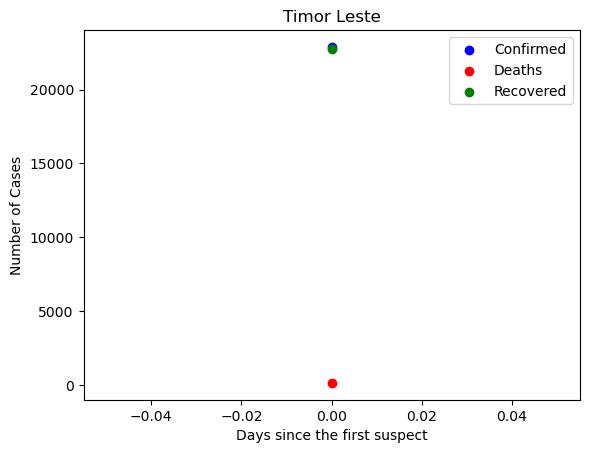

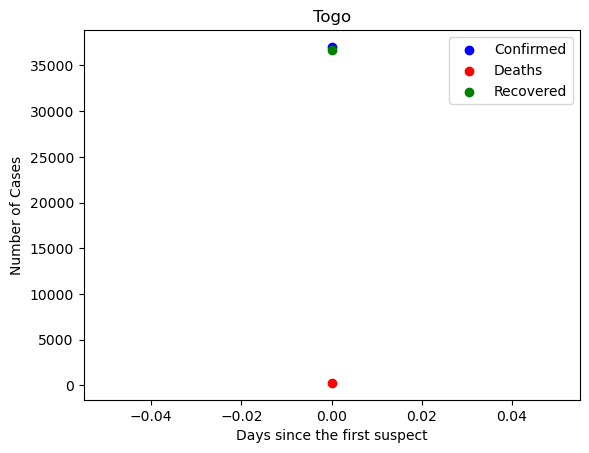

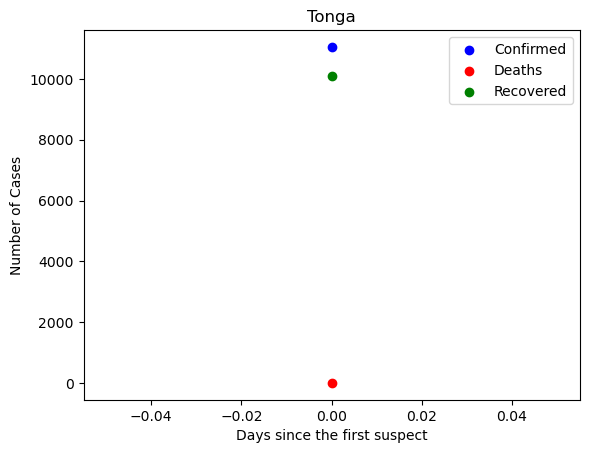

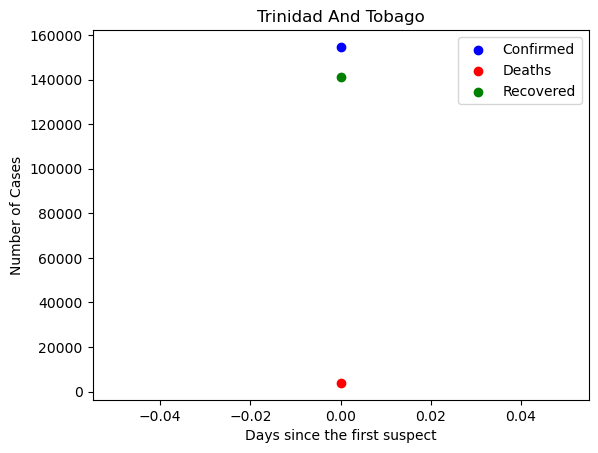

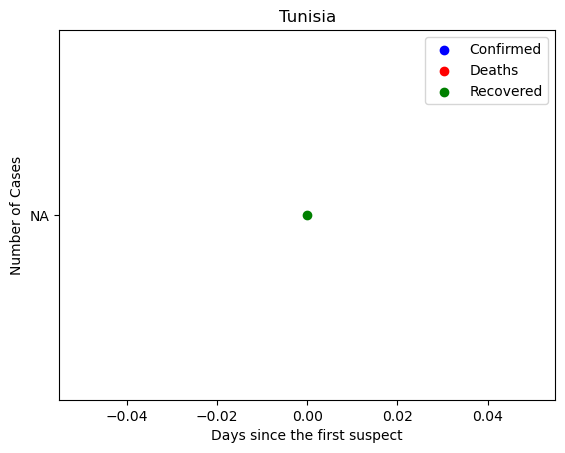

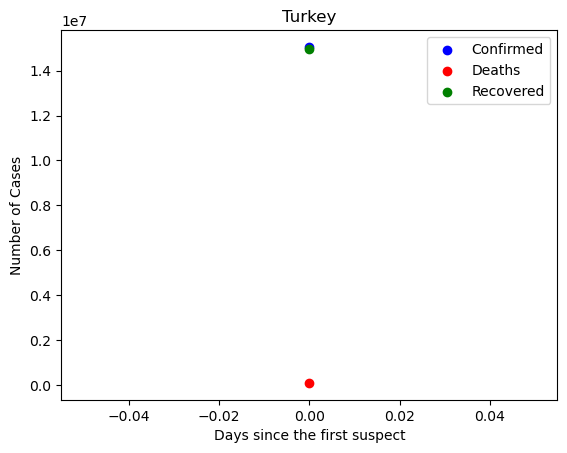

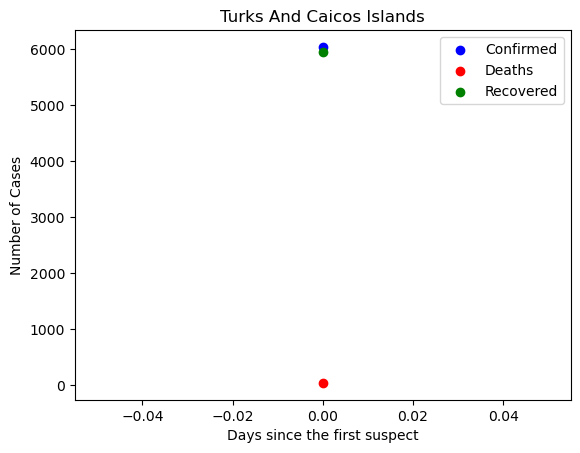

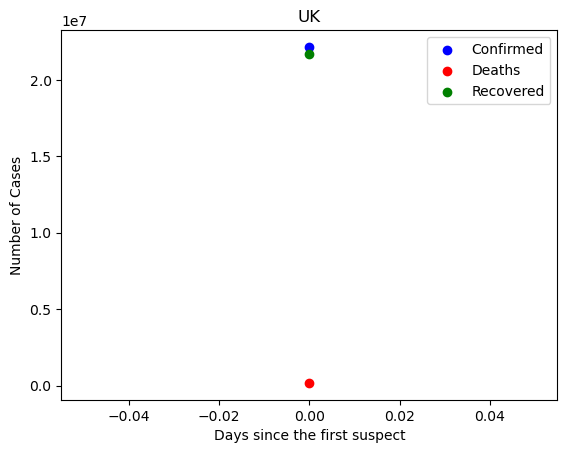

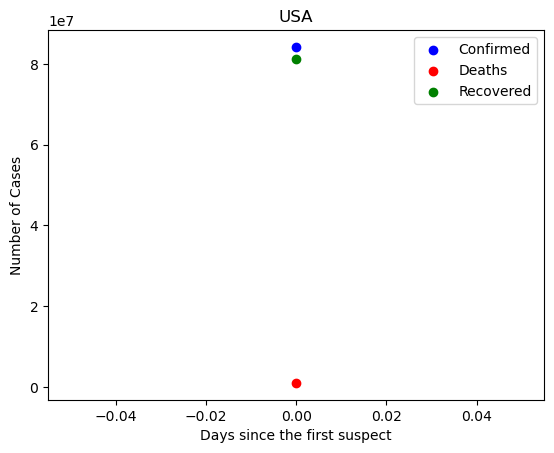

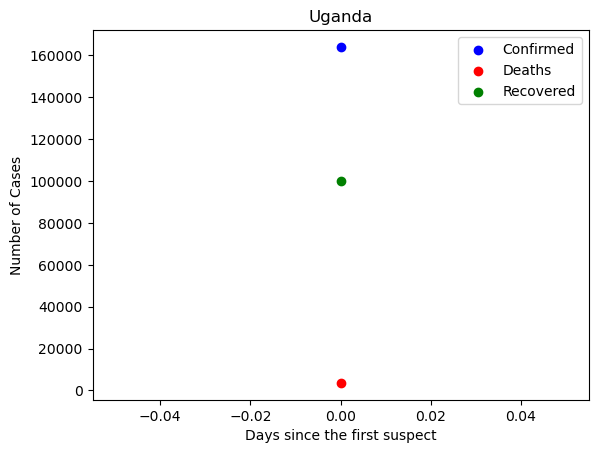

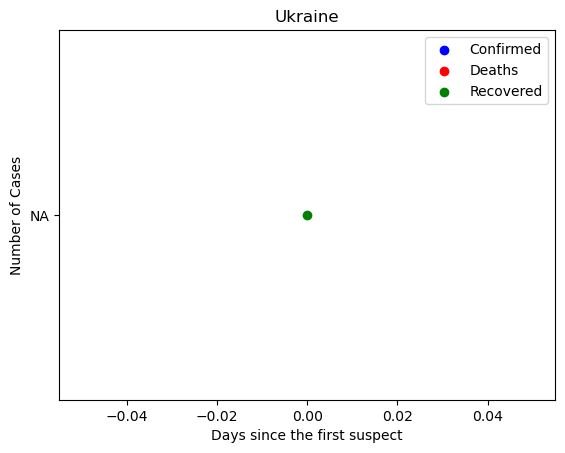

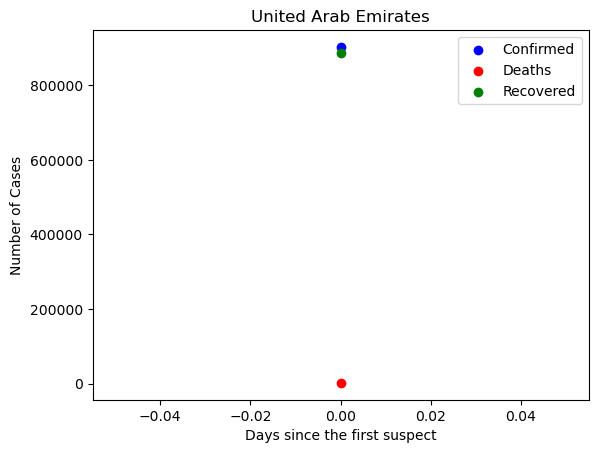

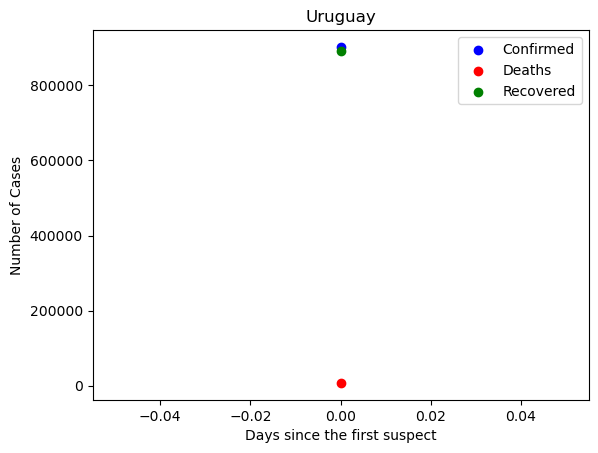

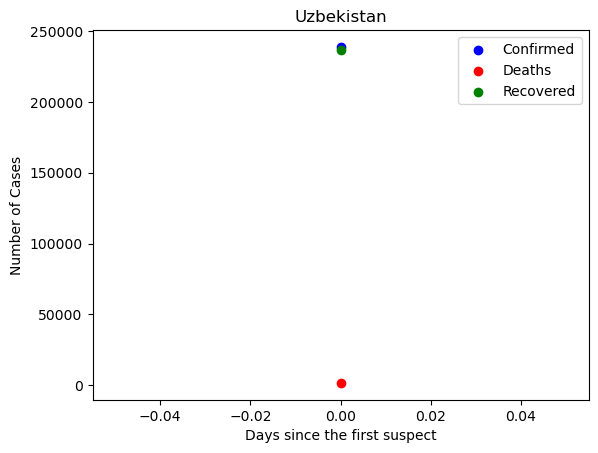

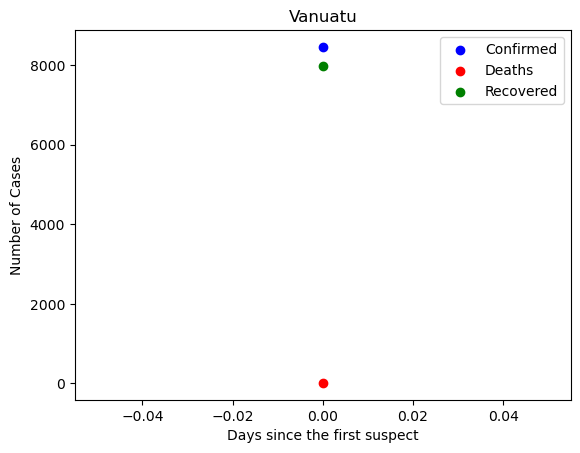

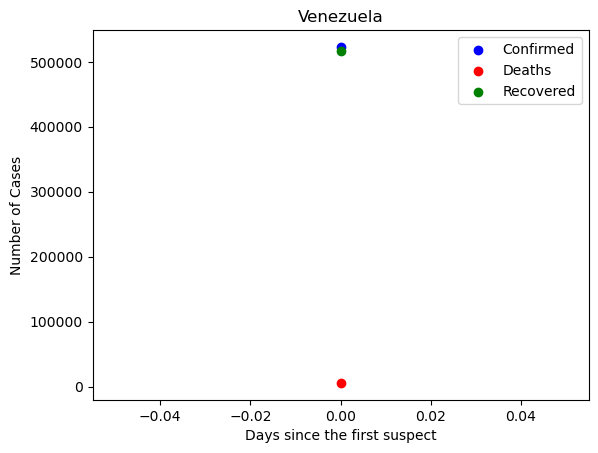

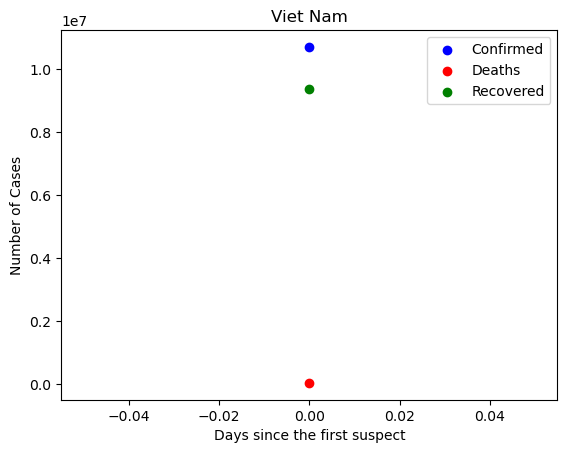

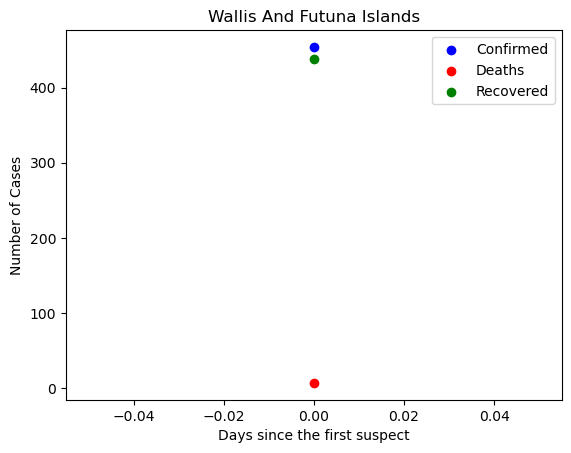

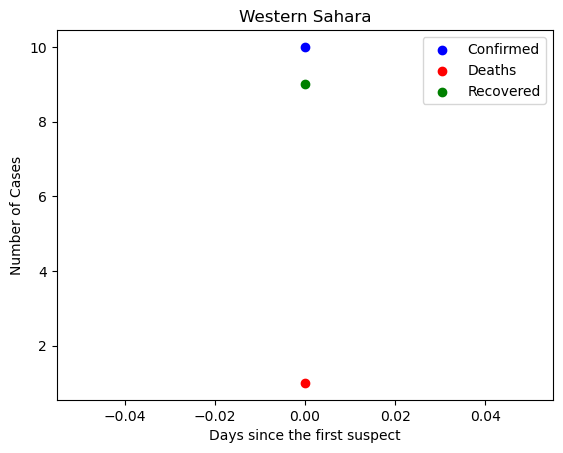

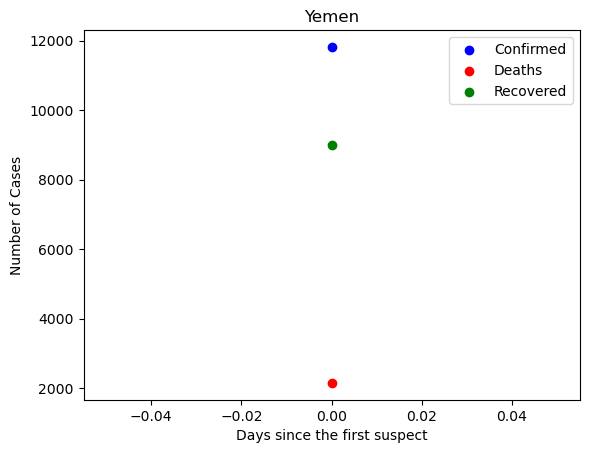

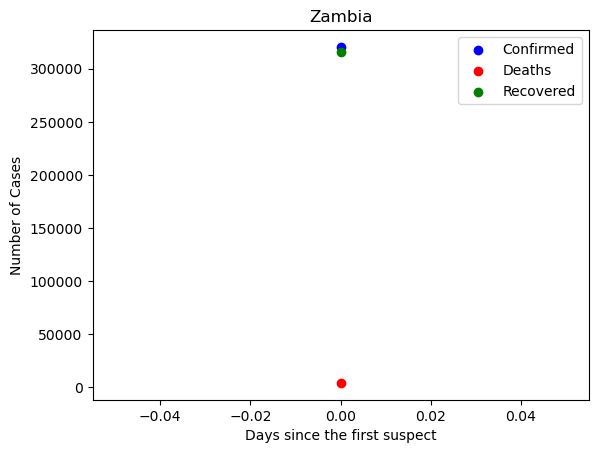

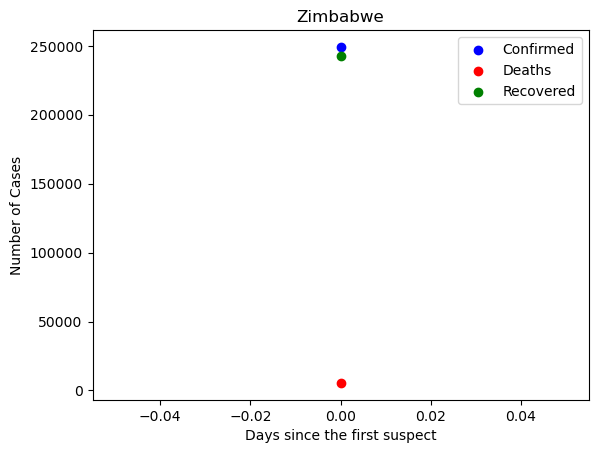

In [18]:
for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Total Confirmed Cases'],color = 'blue',label = 'Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Total Confirmed Deaths'],color = 'red',label = 'Deaths')
    plt.scatter(np.arange(0,len(C)),C['Total Recovered Patients'],color = 'green',label = 'Recovered')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

In [20]:
numeric_columns = ['Total Confirmed Cases', 'Total Confirmed Deaths', 'Total Recovered Patients']
for col in numeric_columns:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')

In [22]:
df3 = df3.dropna(subset=numeric_columns)

In [24]:
df4 = df3.groupby('Continent')[numeric_columns].sum().reset_index()

In [26]:
df4

Continent  Total Confirmed Cases  Total Confirmed Deaths  \
0             Africa               10854769                219805.0   
1               Asia              130799624               1394115.0   
2  Australia/Oceania                7870005                 10764.0   
3             Europe              178307464               1603790.0   
4      North America               99614478               1467166.0   
5      South America               52691172               1047893.0   

   Total Recovered Patients  
0                10137198.0  
1               126145191.0  
2                 7403784.0  
3               170861842.0  
4                94818163.0  
5                51031313.0

In [28]:
continent = df4['Continent'].unique()
len(continent)

6

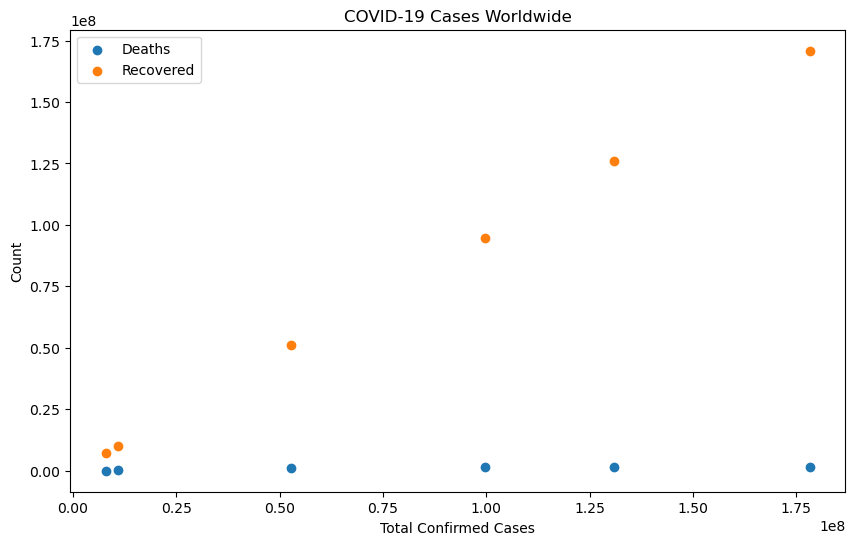

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['Total Confirmed Cases'], df4['Total Confirmed Deaths'], label="Deaths")
plt.scatter(df4['Total Confirmed Cases'], df4['Total Recovered Patients'], label="Recovered")
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Count')
plt.title('COVID-19 Cases Worldwide')
plt.legend()
plt.show()